#### Učitavanje potrebnih biblioteka za rad

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re 
import warnings
from math import pi

In [2]:
warnings.filterwarnings('ignore')

#### Učitavanje podataka

In [3]:
team_stats_combined_df=pd.read_csv("./data/euroleague_header.csv")
player_stats_combined_df=pd.read_csv("./data/euroleague_box_score.csv")
player_position_df=pd.read_csv("./data/euroleague_alltime.csv")

#### Odbacivanje podataka starijih od 5 godina, zbog velike razlike u timovima koje su igrale u ranijem periodu

In [4]:
player_stats_combined_df

,game_player_id,game_id,game,round,phase,season_code,player_id,is_starter,is_playing,team_id,...,defensive_rebounds,total_rebounds,assists,steals,turnovers,blocks_favour,blocks_against,fouls_committed,fouls_received,valuation
0,E2007_191_PADS,E2007_191,BAR-ROM,17,TOP 16,E2007,PADS,1,1,BAR,...,2,2,0,1,0,0,0,1,4,18
1,E2007_191_PAZU,E2007_191,BAR-ROM,17,TOP 16,E2007,PAZU,0,1,BAR,...,3,5,3,2,2,0,0,1,0,8
2,E2007_191_PJJF,E2007_191,BAR-ROM,17,TOP 16,E2007,PJJF,1,1,BAR,...,5,8,0,1,2,0,0,0,1,14
3,E2007_191_PAHW,E2007_191,BAR-ROM,17,TOP 16,E2007,PAHW,0,1,BAR,...,1,1,0,0,0,2,0,1,1,6
4,E2007_191_PATA,E2007_191,BAR-ROM,17,TOP 16,E2007,PATA,1,1,BAR,...,2,2,3,1,4,0,0,1,4,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108020,E2023_230_P012765,E2023_230,BAS-ASV,26,REGULAR SEASON,E2023,P012765,0,1,BAS,...,0,0,0,0,0,0,0,1,0,-1
108021,E2023_072_P012765,E2023_072,BAS-BAR,8,REGULAR SEASON,E2023,P012765,0,1,BAS,...,3,3,3,1,1,0,1,3,1,6
108022,E2023_090_P012765,E2023_090,BAS-MCO,10,REGULAR SEASON,E2023,P012765,0,1,BAS,...,1,1,4,0,2,1,0,0,1,8
108023,E2023_120_P012765,E2023_120,BAS-VIR,14,REGULAR SEASON,E2023,P012765,0,1,BAS,...,0,0,3,0,1,0,0,2,0,-1


In [5]:
player_stats_combined_df['year']=player_stats_combined_df['season_code'].str.extract('(\d+)')
player_stats_combined_df['year']=player_stats_combined_df['year'].astype(int)

player_stats_combined_df=player_stats_combined_df[player_stats_combined_df['year']>=2018]

player_stats_combined_df

,game_player_id,game_id,game,round,phase,season_code,player_id,is_starter,is_playing,team_id,...,total_rebounds,assists,steals,turnovers,blocks_favour,blocks_against,fouls_committed,fouls_received,valuation,year
56969,E2018_254_P001948,E2018_254,BAR-IST,34,PLAYOFFS,E2018,P001948,0,1,BAR,...,4,1,0,1,0,1,3,3,11,2018
56970,E2018_254_P006433,E2018_254,BAR-IST,34,PLAYOFFS,E2018,P006433,1,1,BAR,...,2,4,0,1,0,1,2,1,5,2018
56971,E2018_254_PJUG,E2018_254,BAR-IST,34,PLAYOFFS,E2018,PJUG,1,1,BAR,...,0,0,0,0,0,0,0,1,-2,2018
56972,E2018_254_P006614,E2018_254,BAR-IST,34,PLAYOFFS,E2018,P006614,1,1,BAR,...,5,1,1,0,0,0,4,2,12,2018
56973,E2018_254_P005099,E2018_254,BAR-IST,34,PLAYOFFS,E2018,P005099,0,1,BAR,...,3,2,0,2,0,1,2,3,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108020,E2023_230_P012765,E2023_230,BAS-ASV,26,REGULAR SEASON,E2023,P012765,0,1,BAS,...,0,0,0,0,0,0,1,0,-1,2023
108021,E2023_072_P012765,E2023_072,BAS-BAR,8,REGULAR SEASON,E2023,P012765,0,1,BAS,...,3,3,1,1,0,1,3,1,6,2023
108022,E2023_090_P012765,E2023_090,BAS-MCO,10,REGULAR SEASON,E2023,P012765,0,1,BAS,...,1,4,0,2,1,0,0,1,8,2023
108023,E2023_120_P012765,E2023_120,BAS-VIR,14,REGULAR SEASON,E2023,P012765,0,1,BAS,...,0,3,0,1,0,0,2,0,-1,2023


In [6]:
team_stats_combined_df

,game_id,game,date,time,round,phase,season_code,score_a,score_b,team_a,...,score_quarter_3_b,score_quarter_4_b,score_extra_time_1_a,score_extra_time_2_a,score_extra_time_3_a,score_extra_time_4_a,score_extra_time_1_b,score_extra_time_2_b,score_extra_time_3_b,score_extra_time_4_b
0,E2007_001,OLY-BAS,2007-10-25,20:30:00,1,REGULAR SEASON,E2007,95,90,OLYMPIACOS PIRAEUS B.C.,...,65,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E2007_002,VIR-ZAL,2007-10-24,20:30:00,1,REGULAR SEASON,E2007,81,75,VIRTUS VIDIVICI BOLOGNA,...,61,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E2007_003,SOP-CSK,2007-10-22,20:15:00,1,REGULAR SEASON,E2007,69,88,PROKOM TREFL SOPOT,...,69,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E2007_004,SIE-LJU,2007-10-24,20:30:00,1,REGULAR SEASON,E2007,80,52,MONTEPASCHI,...,41,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E2007_005,ARI-MAL,2007-10-24,20:45:00,1,REGULAR SEASON,E2007,87,83,ARIS THESSALONIKI,...,65,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,E2023_239,ZAL-OLY,2024-03-01,19:00:00,27,REGULAR SEASON,E2023,76,95,ZALGIRIS KAUNAS,...,69,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4215,E2023_240,BAR-MCO,2024-03-01,20:30:00,27,REGULAR SEASON,E2023,67,77,FC BARCELONA,...,60,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4216,E2023_241,MUN-RED,2024-03-01,20:30:00,27,REGULAR SEASON,E2023,74,66,FC BAYERN MUNICH,...,46,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4217,E2023_242,ULK-BAS,2024-03-01,18:45:00,27,REGULAR SEASON,E2023,111,96,FENERBAHCE BEKO ISTANBUL,...,78,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
team_stats_combined_df['year']=team_stats_combined_df['season_code'].str.extract('(\d+)')
team_stats_combined_df['year']=team_stats_combined_df['year'].astype(int)

team_stats_combined_df=team_stats_combined_df[team_stats_combined_df['year']>=2018]
team_stats_combined_df

,game_id,game,date,time,round,phase,season_code,score_a,score_b,team_a,...,score_quarter_4_b,score_extra_time_1_a,score_extra_time_2_a,score_extra_time_3_a,score_extra_time_4_a,score_extra_time_1_b,score_extra_time_2_b,score_extra_time_3_b,score_extra_time_4_b,year
2510,E2018_001,BUD-MIL,2018-10-12,18:45:00,1,REGULAR SEASON,E2018,71,82,BUDUCNOST VOLI PODGORICA,...,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
2511,E2018_002,CSK-BAR,2018-10-11,19:00:00,1,REGULAR SEASON,E2018,95,75,CSKA MOSCOW,...,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
2512,E2018_003,PAN-TEL,2018-10-11,20:00:00,1,REGULAR SEASON,E2018,89,84,PANATHINAIKOS OPAP ATHENS,...,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
2513,E2018_004,MAD-DAR,2018-10-11,21:00:00,1,REGULAR SEASON,E2018,109,93,REAL MADRID,...,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
2514,E2018_005,KHI-OLY,2018-10-12,19:00:00,1,REGULAR SEASON,E2018,66,87,KHIMKI MOSCOW REGION,...,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,E2023_239,ZAL-OLY,2024-03-01,19:00:00,27,REGULAR SEASON,E2023,76,95,ZALGIRIS KAUNAS,...,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
4215,E2023_240,BAR-MCO,2024-03-01,20:30:00,27,REGULAR SEASON,E2023,67,77,FC BARCELONA,...,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
4216,E2023_241,MUN-RED,2024-03-01,20:30:00,27,REGULAR SEASON,E2023,74,66,FC BAYERN MUNICH,...,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
4217,E2023_242,ULK-BAS,2024-03-01,18:45:00,27,REGULAR SEASON,E2023,111,96,FENERBAHCE BEKO ISTANBUL,...,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023


#### Pravljenje tabele koja sadrži ime i id tima

In [8]:
unique_teams=team_stats_combined_df[['team_id_a','team_a']].drop_duplicates()

team_name_by_id = pd.DataFrame({'team_id' : unique_teams['team_id_a'],'team_name' : unique_teams['team_a']})

team_name_by_id=team_name_by_id.groupby('team_id')['team_name'].first().reset_index()

# team_name_by_id.to_csv("./organized_data/Timovi_i_id_tima.csv",index=False)
team_name_by_id

,team_id,team_name
0,ASV,LDLC ASVEL VILLEURBANNE
1,BAR,FC BARCELONA LASSA
2,BAS,KIROLBET BASKONIA VITORIA-GASTEIZ
3,BER,ALBA BERLIN
4,BUD,BUDUCNOST VOLI PODGORICA
5,CAN,HERBALIFE GRAN CANARIA
6,CSK,CSKA MOSCOW
7,DAR,DARUSSAFAKA TEKFEN ISTANBUL
8,DYR,ZENIT ST PETERSBURG
9,IST,ANADOLU EFES ISTANBUL


#### Odbacivanje nepotrebnih atributa i izmena naziva kolona

In [9]:
team_player_merged_df=pd.merge(player_stats_combined_df,team_stats_combined_df,on='game_id')
team_player_merged_df=team_player_merged_df[team_player_merged_df['dorsal']=='TOTAL']
team_player_merged_df.drop(columns=['game_player_id','round_x','phase_x','is_starter','is_playing','team_id','dorsal','player','minutes','year_x','game_y','time','round_y','phase_y','season_code_y','team_id_a','team_id_b','coach_a','coach_b','game_time','remaining_partial_time','referee_1','referee_2','referee_3','capacity', 'w_id', 'fouls_a', 'fouls_b', 'timeouts_a', 'timeouts_b', 'score_quarter_1_a', 'score_quarter_2_a', 'score_quarter_3_a', 'score_quarter_4_a', 'score_quarter_1_b', 'score_quarter_2_b', 'score_quarter_3_b', 'score_quarter_4_b', 'score_extra_time_1_a', 'score_extra_time_2_a', 'score_extra_time_3_a', 'score_extra_time_4_a', 'score_extra_time_1_b', 'score_extra_time_2_b','score_extra_time_3_b','score_extra_time_4_b','year_y','stadium','team_a','team_b','score_a','score_b','game_x'],inplace=True)

team_merged_df = team_player_merged_df.set_index(['game_id', team_player_merged_df.groupby('game_id').cumcount()]).unstack().reset_index()

cols=team_merged_df.columns[1:]

columns = ['game_id']
for col in cols:
    team_index=col[1]
    prefix='h' if team_index==0 else 'a'
    column_name=f'{prefix}_{col[0]}'
    columns.append(column_name)

team_merged_df.columns = columns
team_merged_df=team_merged_df.rename(columns={'h_player_id':'h_team_id','a_player_id':'a_team_id','h_date':'date','h_season_code_x':'season_code'})
team_merged_df['season']=team_merged_df['season_code'].str[1:]
team_merged_df.drop(columns=['a_season_code_x','a_date','season_code'],inplace=True)

team_merged_df.sort_values(by = 'date', ascending = False, inplace=True)
team_merged_df.reset_index(inplace = True, drop = True)
team_merged_df=team_merged_df[['date','game_id','season'] + [kolona for kolona in team_merged_df.columns if kolona not in ['date','game_id','season']]]
team_merged_df

,date,game_id,season,h_team_id,a_team_id,h_points,a_points,h_two_points_made,a_two_points_made,h_two_points_attempted,...,h_blocks_favour,a_blocks_favour,h_blocks_against,a_blocks_against,h_fouls_committed,a_fouls_committed,h_fouls_received,a_fouls_received,h_valuation,a_valuation
0,2024-03-01,E2023_243,2023,ASV,MIL,81,77,21,17,35,...,1,2,2,1,22,22,22,22,96,78
1,2024-03-01,E2023_242,2023,ULK,BAS,111,96,23,21,34,...,5,2,2,5,16,15,15,16,140,108
2,2024-03-01,E2023_241,2023,MUN,RED,74,66,17,17,33,...,2,2,2,2,16,19,19,16,96,61
3,2024-03-01,E2023_240,2023,BAR,MCO,67,77,19,24,39,...,0,3,3,0,21,22,22,21,66,94
4,2024-03-01,E2023_239,2023,ZAL,OLY,76,95,21,25,38,...,1,3,3,1,20,16,16,20,71,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2018-10-12,E2018_007,2018,ULK,CAN,97,72,29,18,45,...,1,1,1,1,22,24,24,21,126,63
1705,2018-10-11,E2018_008,2018,MUN,IST,71,90,22,23,37,...,1,3,3,1,15,12,12,15,76,119
1706,2018-10-11,E2018_004,2018,MAD,DAR,109,93,24,30,38,...,4,2,2,4,22,21,21,22,129,92
1707,2018-10-11,E2018_003,2018,PAN,TEL,89,84,28,25,49,...,5,2,2,5,16,22,22,16,106,85


#### Sređivanje tabele sa statistikom igrača

In [10]:
def get_team_name(team_id):
    return team_name_by_id[team_name_by_id['team_id'] == team_id]['team_name'].values[0]

def get_opposing_team(row):
    if row['team_id'] == row['team_id_a']:
        return get_team_name(row['team_id_b'])
    else:
        return get_team_name(row['team_id_a'])

player_stats_combined_df=player_stats_combined_df[player_stats_combined_df['dorsal']!='TOTAL']


player_stats_combined_df[['team_id_a','team_id_b']]=player_stats_combined_df['game'].str.split('-',expand=True)

player_stats_combined_df['player_team']=player_stats_combined_df['team_id'].apply(lambda x: get_team_name(x))
player_stats_combined_df['opposing_team'] = player_stats_combined_df.apply(get_opposing_team, axis=1)
player_stats_combined_df['season']=player_stats_combined_df['season_code'].str[1:]
player_stats_combined_df['date']=player_stats_combined_df['game_id'].map(team_stats_combined_df.set_index('game_id')['date'])
player_stats_combined_df['home_court'] = player_stats_combined_df['player_team'] == player_stats_combined_df['game'].str.split('-').str[0].apply(lambda x:get_team_name(x))
player_stats_combined_df['home_court']=player_stats_combined_df['home_court'].astype(int)

l = ['player', 'player_team', 'opposing_team','date', 'game_id', 'season']
other = [x for x in player_stats_combined_df.columns if x not in l]
player_stats_combined_df = player_stats_combined_df[l + other]

player_stats_combined_df

,player,player_team,opposing_team,date,game_id,season,game_player_id,game,round,phase,...,turnovers,blocks_favour,blocks_against,fouls_committed,fouls_received,valuation,year,team_id_a,team_id_b,home_court
56969,"SERAPHIN, KEVIN",FC BARCELONA LASSA,ANADOLU EFES ISTANBUL,2019-04-26,E2018_254,2018,E2018_254_P001948,BAR-IST,34,PLAYOFFS,...,1,0,1,3,3,11,2018,BAR,IST,1
56970,"PANGOS, KEVIN",FC BARCELONA LASSA,ANADOLU EFES ISTANBUL,2019-04-26,E2018_254,2018,E2018_254_P006433,BAR-IST,34,PLAYOFFS,...,1,0,1,2,1,5,2018,BAR,IST,1
56971,"RIBAS, PAU",FC BARCELONA LASSA,ANADOLU EFES ISTANBUL,2019-04-26,E2018_254,2018,E2018_254_PJUG,BAR-IST,34,PLAYOFFS,...,0,0,0,0,1,-2,2018,BAR,IST,1
56972,"SINGLETON, CHRIS",FC BARCELONA LASSA,ANADOLU EFES ISTANBUL,2019-04-26,E2018_254,2018,E2018_254_P006614,BAR-IST,34,PLAYOFFS,...,0,0,0,4,2,12,2018,BAR,IST,1
56973,"HANGA, ADAM",FC BARCELONA LASSA,ANADOLU EFES ISTANBUL,2019-04-26,E2018_254,2018,E2018_254_P005099,BAR-IST,34,PLAYOFFS,...,2,0,1,2,3,0,2018,BAR,IST,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108020,"CHRIS, CHIOZZA",KIROLBET BASKONIA VITORIA-GASTEIZ,LDLC ASVEL VILLEURBANNE,2024-02-08,E2023_230,2023,E2023_230_P012765,BAS-ASV,26,REGULAR SEASON,...,0,0,0,1,0,-1,2023,BAS,ASV,1
108021,"CHRIS, CHIOZZA",KIROLBET BASKONIA VITORIA-GASTEIZ,FC BARCELONA LASSA,2023-11-15,E2023_072,2023,E2023_072_P012765,BAS-BAR,8,REGULAR SEASON,...,1,0,1,3,1,6,2023,BAS,BAR,1
108022,"CHRIS, CHIOZZA",KIROLBET BASKONIA VITORIA-GASTEIZ,AS MONACO,2023-11-24,E2023_090,2023,E2023_090_P012765,BAS-MCO,10,REGULAR SEASON,...,2,1,0,0,1,8,2023,BAS,MCO,1
108023,"CHRIS, CHIOZZA",KIROLBET BASKONIA VITORIA-GASTEIZ,VIRTUS SEGAFREDO BOLOGNA,2023-12-14,E2023_120,2023,E2023_120_P012765,BAS-VIR,14,REGULAR SEASON,...,1,0,0,2,0,-1,2023,BAS,VIR,1


#### Odbacivanje nepotrebnih atributa i promena formata imena igrača

In [11]:
player_stats_combined_df['player'] = player_stats_combined_df['player'].str.title()
player_stats_combined_df['player'] = player_stats_combined_df['player'].str.replace(',',' ')
player_stats_combined_df['player'] = player_stats_combined_df['player'].str.split().apply(lambda x:' '.join(x[::-1]))

player_stats_combined_df.drop(columns=['phase','season_code','player_id','round','game_player_id','game','is_starter','is_playing','team_id','dorsal','year','team_id_a','team_id_b'],inplace=True)

player_stats_combined_df


,player,player_team,opposing_team,date,game_id,season,minutes,points,two_points_made,two_points_attempted,...,total_rebounds,assists,steals,turnovers,blocks_favour,blocks_against,fouls_committed,fouls_received,valuation,home_court
56969,Kevin Seraphin,FC BARCELONA LASSA,ANADOLU EFES ISTANBUL,2019-04-26,E2018_254,2018,19:51,12,6,10,...,4,1,0,1,0,1,3,3,11,1
56970,Kevin Pangos,FC BARCELONA LASSA,ANADOLU EFES ISTANBUL,2019-04-26,E2018_254,2018,20:31,6,3,7,...,2,4,0,1,0,1,2,1,5,1
56971,Pau Ribas,FC BARCELONA LASSA,ANADOLU EFES ISTANBUL,2019-04-26,E2018_254,2018,09:22,0,0,0,...,0,0,0,0,0,0,0,1,-2,1
56972,Chris Singleton,FC BARCELONA LASSA,ANADOLU EFES ISTANBUL,2019-04-26,E2018_254,2018,28:40,12,3,4,...,5,1,1,0,0,0,4,2,12,1
56973,Adam Hanga,FC BARCELONA LASSA,ANADOLU EFES ISTANBUL,2019-04-26,E2018_254,2018,21:10,3,0,3,...,3,2,0,2,0,1,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108020,Chiozza Chris,KIROLBET BASKONIA VITORIA-GASTEIZ,LDLC ASVEL VILLEURBANNE,2024-02-08,E2023_230,2023,01:19,0,0,0,...,0,0,0,0,0,0,1,0,-1,1
108021,Chiozza Chris,KIROLBET BASKONIA VITORIA-GASTEIZ,FC BARCELONA LASSA,2023-11-15,E2023_072,2023,15:50,4,0,1,...,3,3,1,1,0,1,3,1,6,1
108022,Chiozza Chris,KIROLBET BASKONIA VITORIA-GASTEIZ,AS MONACO,2023-11-24,E2023_090,2023,13:02,5,0,1,...,1,4,0,2,1,0,0,1,8,1
108023,Chiozza Chris,KIROLBET BASKONIA VITORIA-GASTEIZ,VIRTUS SEGAFREDO BOLOGNA,2023-12-14,E2023_120,2023,07:06,0,0,1,...,0,3,0,1,0,0,2,0,-1,1


#### Odbacivanje podataka za igrače koji nisu upisali minute na meču

In [12]:
player_stats_combined_df.isna().sum()

player                    0
player_team               0
opposing_team             0
date                      0
game_id                   0
season                    0
minutes                   3
points                    0
two_points_made           0
two_points_attempted      0
three_points_made         0
three_points_attempted    0
free_throws_made          0
free_throws_attempted     0
offensive_rebounds        0
defensive_rebounds        0
total_rebounds            0
assists                   0
steals                    0
turnovers                 0
blocks_favour             0
blocks_against            0
fouls_committed           0
fouls_received            0
valuation                 0
home_court                0
dtype: int64

In [13]:
player_stats_combined_df=player_stats_combined_df[player_stats_combined_df['minutes']!='DNP']
player_stats_combined_df=player_stats_combined_df.dropna(subset=['minutes'])

In [14]:
player_stats_combined_df.sort_values(by='date',ascending=False,inplace=True)
player_stats_combined_df.reset_index(inplace=True,drop=True)

In [15]:
player_stats_combined_df.isna().sum()

player                    0
player_team               0
opposing_team             0
date                      0
game_id                   0
season                    0
minutes                   0
points                    0
two_points_made           0
two_points_attempted      0
three_points_made         0
three_points_attempted    0
free_throws_made          0
free_throws_attempted     0
offensive_rebounds        0
defensive_rebounds        0
total_rebounds            0
assists                   0
steals                    0
turnovers                 0
blocks_favour             0
blocks_against            0
fouls_committed           0
fouls_received            0
valuation                 0
home_court                0
dtype: int64

In [16]:
team_merged_df.isna().sum()

date                        0
game_id                     0
season                      0
h_team_id                   0
a_team_id                   0
h_points                    0
a_points                    0
h_two_points_made           0
a_two_points_made           0
h_two_points_attempted      0
a_two_points_attempted      0
h_three_points_made         0
a_three_points_made         0
h_three_points_attempted    0
a_three_points_attempted    0
h_free_throws_made          0
a_free_throws_made          0
h_free_throws_attempted     0
a_free_throws_attempted     0
h_offensive_rebounds        0
a_offensive_rebounds        0
h_defensive_rebounds        0
a_defensive_rebounds        0
h_total_rebounds            0
a_total_rebounds            0
h_assists                   0
a_assists                   0
h_steals                    0
a_steals                    0
h_turnovers                 0
a_turnovers                 0
h_blocks_favour             0
a_blocks_favour             0
h_blocks_a

#### Promena formata minutaže igrača na meču

In [17]:
player_stats_combined_df['minutes'] = player_stats_combined_df['minutes'].apply(lambda x: float(str(x).split(':')[0]) + (float(str(x).split(':')[1]) if len(str(x).split(':')) > 1 else 0) / 60)
player_stats_combined_df = player_stats_combined_df.sort_values(by = 'date').reset_index(drop = True)
player_stats_combined_df

,player,player_team,opposing_team,date,game_id,season,minutes,points,two_points_made,two_points_attempted,...,total_rebounds,assists,steals,turnovers,blocks_favour,blocks_against,fouls_committed,fouls_received,valuation,home_court
0,Metecan Birsen,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2018-10-11,E2018_008,2018,4.033333,2,1,1,...,0,0,0,0,0,0,0,0,2,0
1,Leon Radosevic,FC BAYERN MUNICH,ANADOLU EFES ISTANBUL,2018-10-11,E2018_008,2018,12.066667,0,0,2,...,2,0,0,0,1,0,0,0,1,1
2,Kevin Pangos,FC BARCELONA LASSA,CSKA MOSCOW,2018-10-11,E2018_002,2018,15.116667,2,1,3,...,0,1,0,4,0,1,3,0,-8,0
3,Kevin Seraphin,FC BARCELONA LASSA,CSKA MOSCOW,2018-10-11,E2018_002,2018,18.883333,6,3,7,...,7,3,1,2,0,0,2,0,9,0
4,Othello Hunter,CSKA MOSCOW,FC BARCELONA LASSA,2018-10-11,E2018_002,2018,19.266667,6,1,3,...,1,0,2,0,0,0,3,3,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36898,Shaquielle Mckissic,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,23.633333,20,5,5,...,3,3,2,0,0,0,1,3,26,0
36899,Filip Petrusev,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,20.550000,6,1,3,...,3,1,0,1,1,0,1,3,9,0
36900,Alec Peters,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,27.533333,16,3,6,...,3,3,0,0,0,0,1,5,23,0
36901,Kostas Papanikolaou,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,27.650000,7,1,1,...,2,3,1,1,0,0,0,1,10,0


#### Dodavanje pozicije igrača i popunjavanje nedostajućih vrednosti pozicijom "Forward" na osnovu analize nedostajućih podataka i njihovih pozicija

In [18]:
player_stats_combined_df=pd.merge(player_stats_combined_df,player_position_df,on='player',how='left')
player_stats_combined_df.isna().sum()

player                       0
player_team                  0
opposing_team                0
date                         0
game_id                      0
season                       0
minutes                      0
points                       0
two_points_made              0
two_points_attempted         0
three_points_made            0
three_points_attempted       0
free_throws_made             0
free_throws_attempted        0
offensive_rebounds           0
defensive_rebounds           0
total_rebounds               0
assists                      0
steals                       0
turnovers                    0
blocks_favour                0
blocks_against               0
fouls_committed              0
fouls_received               0
valuation                    0
home_court                   0
position                  1452
dtype: int64

In [19]:
player_stats_combined_df.fillna('Forward',inplace=True)
player_stats_combined_df.isna().sum()

player                    0
player_team               0
opposing_team             0
date                      0
game_id                   0
season                    0
minutes                   0
points                    0
two_points_made           0
two_points_attempted      0
three_points_made         0
three_points_attempted    0
free_throws_made          0
free_throws_attempted     0
offensive_rebounds        0
defensive_rebounds        0
total_rebounds            0
assists                   0
steals                    0
turnovers                 0
blocks_favour             0
blocks_against            0
fouls_committed           0
fouls_received            0
valuation                 0
home_court                0
position                  0
dtype: int64

In [20]:
player_stats_combined_df

,player,player_team,opposing_team,date,game_id,season,minutes,points,two_points_made,two_points_attempted,...,assists,steals,turnovers,blocks_favour,blocks_against,fouls_committed,fouls_received,valuation,home_court,position
0,Metecan Birsen,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2018-10-11,E2018_008,2018,4.033333,2,1,1,...,0,0,0,0,0,0,0,2,0,Forward
1,Leon Radosevic,FC BAYERN MUNICH,ANADOLU EFES ISTANBUL,2018-10-11,E2018_008,2018,12.066667,0,0,2,...,0,0,0,1,0,0,0,1,1,Center
2,Kevin Pangos,FC BARCELONA LASSA,CSKA MOSCOW,2018-10-11,E2018_002,2018,15.116667,2,1,3,...,1,0,4,0,1,3,0,-8,0,Guard
3,Kevin Seraphin,FC BARCELONA LASSA,CSKA MOSCOW,2018-10-11,E2018_002,2018,18.883333,6,3,7,...,3,1,2,0,0,2,0,9,0,Forward
4,Othello Hunter,CSKA MOSCOW,FC BARCELONA LASSA,2018-10-11,E2018_002,2018,19.266667,6,1,3,...,0,2,0,0,0,3,3,7,1,Center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36898,Shaquielle Mckissic,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,23.633333,20,5,5,...,3,2,0,0,0,1,3,26,0,Guard
36899,Filip Petrusev,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,20.550000,6,1,3,...,1,0,1,1,0,1,3,9,0,Center
36900,Alec Peters,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,27.533333,16,3,6,...,3,0,0,0,0,1,5,23,0,Center
36901,Kostas Papanikolaou,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,27.650000,7,1,1,...,3,1,1,0,0,0,1,10,0,Forward


#### Dodavanje napredne statistike "True shooting" 

In [21]:
player_stats_combined_df['ts%']=(player_stats_combined_df['two_points_made']*2+player_stats_combined_df['three_points_made']*3)/(player_stats_combined_df['two_points_attempted']*2+player_stats_combined_df['three_points_attempted']*3)
player_stats_combined_df

,player,player_team,opposing_team,date,game_id,season,minutes,points,two_points_made,two_points_attempted,...,steals,turnovers,blocks_favour,blocks_against,fouls_committed,fouls_received,valuation,home_court,position,ts%
0,Metecan Birsen,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2018-10-11,E2018_008,2018,4.033333,2,1,1,...,0,0,0,0,0,0,2,0,Forward,1.000000
1,Leon Radosevic,FC BAYERN MUNICH,ANADOLU EFES ISTANBUL,2018-10-11,E2018_008,2018,12.066667,0,0,2,...,0,0,1,0,0,0,1,1,Center,0.000000
2,Kevin Pangos,FC BARCELONA LASSA,CSKA MOSCOW,2018-10-11,E2018_002,2018,15.116667,2,1,3,...,0,4,0,1,3,0,-8,0,Guard,0.222222
3,Kevin Seraphin,FC BARCELONA LASSA,CSKA MOSCOW,2018-10-11,E2018_002,2018,18.883333,6,3,7,...,1,2,0,0,2,0,9,0,Forward,0.428571
4,Othello Hunter,CSKA MOSCOW,FC BARCELONA LASSA,2018-10-11,E2018_002,2018,19.266667,6,1,3,...,2,0,0,0,3,3,7,1,Center,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36898,Shaquielle Mckissic,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,23.633333,20,5,5,...,2,0,0,0,1,3,26,0,Guard,0.640000
36899,Filip Petrusev,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,20.550000,6,1,3,...,0,1,1,0,1,3,9,0,Center,0.222222
36900,Alec Peters,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,27.533333,16,3,6,...,0,0,0,0,1,5,23,0,Center,0.666667
36901,Kostas Papanikolaou,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,27.650000,7,1,1,...,1,1,0,0,0,1,10,0,Forward,0.357143


#### Sređivanje tabele sa timskom statistikom na meču

In [22]:
team_player_merged_df=team_player_merged_df.merge(team_name_by_id,left_on=['player_id'],right_on=['team_id'])
team_player_merged_df.drop(columns=['player_id','season_code_x','date','team_id'],inplace=True)
team_player_merged_df

,game_id,points,two_points_made,two_points_attempted,three_points_made,three_points_attempted,free_throws_made,free_throws_attempted,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,turnovers,blocks_favour,blocks_against,fouls_committed,fouls_received,valuation,team_name
0,E2018_254,82,25,48,8,22,8,9,14,23,37,17,7,8,3,6,24,19,89,FC BARCELONA LASSA
1,E2018_254,72,9,22,11,26,21,26,5,23,28,13,5,14,6,3,19,24,79,ANADOLU EFES ISTANBUL
2,E2018_240,83,23,35,8,23,13,14,5,24,29,20,6,14,1,6,17,20,94,FC BARCELONA LASSA
3,E2018_240,74,16,32,11,27,9,16,11,20,31,15,8,16,6,1,20,16,74,KHIMKI MOSCOW REGION
4,E2018_044,90,22,44,9,22,19,23,7,24,31,18,5,12,1,2,23,24,93,HERBALIFE GRAN CANARIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,E2023_242,96,21,32,14,26,12,12,5,24,29,20,4,16,2,5,15,16,108,KIROLBET BASKONIA VITORIA-GASTEIZ
3414,E2023_241,74,17,33,9,26,13,14,6,30,36,18,7,8,2,2,16,19,96,FC BAYERN MUNICH
3415,E2023_241,66,17,36,8,30,8,10,12,25,37,8,5,9,2,2,19,16,61,CRVENA ZVEZDA MTS BELGRADE
3416,E2023_240,67,19,39,4,27,17,22,14,24,38,15,6,10,0,3,21,22,66,FC BARCELONA LASSA


#### Pravljenje tabele koja će biti korišćena za računanje raznih statistika

In [23]:
player_stats_combined_df_2=pd.merge(player_stats_combined_df,team_player_merged_df,how='left',left_on=['game_id','player_team'],right_on=['game_id','team_name'])
player_stats_combined_df_2.drop(columns=['team_name'],inplace=True)
player_stats_combined_df_2

,player,player_team,opposing_team,date,game_id,season,minutes,points_x,two_points_made_x,two_points_attempted_x,...,defensive_rebounds_y,total_rebounds_y,assists_y,steals_y,turnovers_y,blocks_favour_y,blocks_against_y,fouls_committed_y,fouls_received_y,valuation_y
0,Metecan Birsen,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2018-10-11,E2018_008,2018,4.033333,2,1,1,...,27,31,23,3,13,3,1,12,15,119
1,Leon Radosevic,FC BAYERN MUNICH,ANADOLU EFES ISTANBUL,2018-10-11,E2018_008,2018,12.066667,0,0,2,...,15,21,19,11,7,1,3,15,12,76
2,Kevin Pangos,FC BARCELONA LASSA,CSKA MOSCOW,2018-10-11,E2018_002,2018,15.116667,2,1,3,...,25,40,21,4,16,6,4,29,27,74
3,Kevin Seraphin,FC BARCELONA LASSA,CSKA MOSCOW,2018-10-11,E2018_002,2018,18.883333,6,3,7,...,25,40,21,4,16,6,4,29,27,74
4,Othello Hunter,CSKA MOSCOW,FC BARCELONA LASSA,2018-10-11,E2018_002,2018,19.266667,6,1,3,...,33,43,21,8,13,4,6,27,29,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36898,Shaquielle Mckissic,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,23.633333,20,5,5,...,20,26,23,7,8,3,1,16,20,124
36899,Filip Petrusev,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,20.550000,6,1,3,...,20,26,23,7,8,3,1,16,20,124
36900,Alec Peters,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,27.533333,16,3,6,...,20,26,23,7,8,3,1,16,20,124
36901,Kostas Papanikolaou,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,27.650000,7,1,1,...,20,26,23,7,8,3,1,16,20,124


In [24]:
player_stats_combined_df_2.rename(columns=lambda x : x[:-2] if x.endswith('_x') else ('team_' + x[:-2] if x.endswith('_y') else x),inplace=True)
player_stats_combined_df_2

,player,player_team,opposing_team,date,game_id,season,minutes,points,two_points_made,two_points_attempted,...,team_defensive_rebounds,team_total_rebounds,team_assists,team_steals,team_turnovers,team_blocks_favour,team_blocks_against,team_fouls_committed,team_fouls_received,team_valuation
0,Metecan Birsen,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2018-10-11,E2018_008,2018,4.033333,2,1,1,...,27,31,23,3,13,3,1,12,15,119
1,Leon Radosevic,FC BAYERN MUNICH,ANADOLU EFES ISTANBUL,2018-10-11,E2018_008,2018,12.066667,0,0,2,...,15,21,19,11,7,1,3,15,12,76
2,Kevin Pangos,FC BARCELONA LASSA,CSKA MOSCOW,2018-10-11,E2018_002,2018,15.116667,2,1,3,...,25,40,21,4,16,6,4,29,27,74
3,Kevin Seraphin,FC BARCELONA LASSA,CSKA MOSCOW,2018-10-11,E2018_002,2018,18.883333,6,3,7,...,25,40,21,4,16,6,4,29,27,74
4,Othello Hunter,CSKA MOSCOW,FC BARCELONA LASSA,2018-10-11,E2018_002,2018,19.266667,6,1,3,...,33,43,21,8,13,4,6,27,29,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36898,Shaquielle Mckissic,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,23.633333,20,5,5,...,20,26,23,7,8,3,1,16,20,124
36899,Filip Petrusev,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,20.550000,6,1,3,...,20,26,23,7,8,3,1,16,20,124
36900,Alec Peters,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,27.533333,16,3,6,...,20,26,23,7,8,3,1,16,20,124
36901,Kostas Papanikolaou,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,27.650000,7,1,1,...,20,26,23,7,8,3,1,16,20,124


#### Računanje statistike igrača na poslednjih n(5) mečeva

In [25]:
def calculate_average_last_n_games(n):
    player_stats_recent_performance_df=pd.DataFrame()

    for season in player_stats_combined_df_2['season'].unique():
        player_stats_season=player_stats_combined_df_2[player_stats_combined_df_2['season']==season]

        for player in player_stats_season['player'].unique():
            player_stats_player=player_stats_season[player_stats_season['player']==player]

            numeric_cols = player_stats_player.select_dtypes(include='number').columns

            numeric_cols=numeric_cols.drop('home_court')
            
            player_stats_recent_performance_numeric = player_stats_player[numeric_cols].rolling(n, min_periods=1).mean().shift(1)

            player_stats_recent_performance = pd.concat([player_stats_player.drop(columns=numeric_cols), player_stats_recent_performance_numeric], axis=1)
            
            player_stats_recent_performance_df=pd.concat([player_stats_recent_performance_df,player_stats_recent_performance])

    columns_to_drop = ['game_id', 'player_team', 'opposing_team', 'date', 'season','player','home_court','position']
    columns_to_drop = ['Last_' + str(n) + '_Avg_' + column_name for column_name in columns_to_drop]

    player_stats_recent_performance_df.columns=['Last_' + str(n) + '_Avg_' + x for x in player_stats_recent_performance_df.columns]
    player_stats_recent_performance_df=player_stats_combined_df[['player','game_id']].merge(player_stats_recent_performance_df.drop(columns=columns_to_drop),left_index=True,right_index=True)

    return player_stats_recent_performance_df


In [26]:
player_recent_performance_df=calculate_average_last_n_games(5)
# player_recent_performance_df.to_csv("./organized_data/Statistika_igraca_na_poslednjih_5_meceva.csv",index=False)
player_recent_performance_df

,player,game_id,Last_5_Avg_minutes,Last_5_Avg_points,Last_5_Avg_two_points_made,Last_5_Avg_two_points_attempted,Last_5_Avg_three_points_made,Last_5_Avg_three_points_attempted,Last_5_Avg_free_throws_made,Last_5_Avg_free_throws_attempted,...,Last_5_Avg_team_defensive_rebounds,Last_5_Avg_team_total_rebounds,Last_5_Avg_team_assists,Last_5_Avg_team_steals,Last_5_Avg_team_turnovers,Last_5_Avg_team_blocks_favour,Last_5_Avg_team_blocks_against,Last_5_Avg_team_fouls_committed,Last_5_Avg_team_fouls_received,Last_5_Avg_team_valuation
0,Metecan Birsen,E2018_008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Leon Radosevic,E2018_008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kevin Pangos,E2018_002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kevin Seraphin,E2018_002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Othello Hunter,E2018_002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36898,Shaquielle Mckissic,E2023_239,15.466667,4.8,1.0,2.0,0.4,1.6,1.6,2.0,...,24.2,35.8,19.8,8.4,9.6,3.4,2.6,19.8,17.6,100.0
36899,Filip Petrusev,E2023_239,17.903333,8.6,3.4,6.4,0.4,0.8,0.6,1.2,...,25.0,36.2,19.4,6.6,10.0,2.8,2.4,19.0,18.6,92.8
36900,Alec Peters,E2023_239,21.373333,11.2,2.4,4.0,1.4,2.6,2.2,2.4,...,24.2,35.8,19.8,8.4,9.6,3.4,2.6,19.8,17.6,100.0
36901,Kostas Papanikolaou,E2023_239,21.783333,9.0,0.8,1.8,2.2,4.6,0.8,1.2,...,24.2,35.8,19.8,8.4,9.6,3.4,2.6,19.8,17.6,100.0


#### Računanje statistike igrača u dosadašnjem delu sezone

In [27]:
def calculate_season_player_stats():
    player_avg_season_stats_df=pd.DataFrame()

    for season in player_stats_combined_df_2['season'].unique():
        player_season_stats=player_stats_combined_df_2[player_stats_combined_df_2['season']==season]
        

        for player in player_season_stats['player'].unique():
            player_season_stats_player=player_season_stats[player_season_stats['player']==player]

            numeric_cols = player_season_stats_player.select_dtypes(include='number').columns

            numeric_cols=numeric_cols.drop('home_court')

            player_avg_season_stats_numeric=player_season_stats_player[numeric_cols].expanding().mean().shift(1)

            player_avg_season_stats = pd.concat([player_season_stats_player.drop(columns=numeric_cols), player_avg_season_stats_numeric], axis=1)
            
            player_avg_season_stats_df=pd.concat([player_avg_season_stats_df,player_avg_season_stats])

    columns_to_drop = ['game_id', 'player_team', 'opposing_team', 'date', 'season','player','home_court','position']
    columns_to_drop = ['Avg_Season_' + column_name for column_name in columns_to_drop]

    player_avg_season_stats_df.columns = ['Avg_Season_' + x for x in player_avg_season_stats_df.columns]
    player_avg_season_stats_df = player_stats_combined_df[['player','player_team','opposing_team','date','game_id','season','home_court']].merge(player_avg_season_stats_df.drop(columns=columns_to_drop), left_index = True, right_index = True)

    return player_avg_season_stats_df

In [28]:
player_avg_season_stats_df=calculate_season_player_stats()
# player_avg_season_stats_df.to_csv("./organized_data/Statistika_igraca_u_dosadasnjem_delu_sezone.csv",index=False)
player_avg_season_stats_df

,player,player_team,opposing_team,date,game_id,season,home_court,Avg_Season_minutes,Avg_Season_points,Avg_Season_two_points_made,...,Avg_Season_team_defensive_rebounds,Avg_Season_team_total_rebounds,Avg_Season_team_assists,Avg_Season_team_steals,Avg_Season_team_turnovers,Avg_Season_team_blocks_favour,Avg_Season_team_blocks_against,Avg_Season_team_fouls_committed,Avg_Season_team_fouls_received,Avg_Season_team_valuation
0,Metecan Birsen,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2018-10-11,E2018_008,2018,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Leon Radosevic,FC BAYERN MUNICH,ANADOLU EFES ISTANBUL,2018-10-11,E2018_008,2018,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kevin Pangos,FC BARCELONA LASSA,CSKA MOSCOW,2018-10-11,E2018_002,2018,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kevin Seraphin,FC BARCELONA LASSA,CSKA MOSCOW,2018-10-11,E2018_002,2018,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Othello Hunter,CSKA MOSCOW,FC BARCELONA LASSA,2018-10-11,E2018_002,2018,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36898,Shaquielle Mckissic,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,0,13.146078,4.764706,0.941176,...,23.058824,33.176471,19.352941,6.882353,11.529412,2.882353,2.235294,18.470588,18.235294,91.588235
36899,Filip Petrusev,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,0,14.771667,5.500000,2.000000,...,24.400000,34.600000,19.600000,5.900000,11.400000,3.300000,2.300000,18.600000,18.300000,89.100000
36900,Alec Peters,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,0,26.772000,14.280000,3.080000,...,22.960000,33.240000,19.720000,6.440000,11.360000,2.800000,2.520000,18.760000,18.960000,92.360000
36901,Kostas Papanikolaou,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,0,24.907692,6.538462,1.076923,...,22.846154,33.115385,19.538462,6.576923,11.500000,2.730769,2.500000,18.500000,19.000000,91.115385


#### Računanje statistike igrača na poslednjih n(2) meča protiv datog protivnika

In [29]:
def calculate_average_last_n_games_opposing_team(n):
    player_stats_opposing_recent_performance_df=pd.DataFrame()

    for opponent in player_stats_combined_df['opposing_team'].unique():
        player_stats_opposing=player_stats_combined_df[player_stats_combined_df['opposing_team']==opponent]

        for player in player_stats_opposing['player'].unique():
            player_stats_player=player_stats_opposing[player_stats_opposing['player']==player]

            numeric_cols = player_stats_player.select_dtypes(include='number').columns

            numeric_cols=numeric_cols.drop('home_court')

            player_stats_opposing_recent_performance_numeric = player_stats_player[numeric_cols].rolling(n, min_periods=1).mean().shift(1)

            player_stats_opposing_recent_performance = pd.concat([player_stats_player.drop(columns=numeric_cols), player_stats_opposing_recent_performance_numeric], axis=1)
            
            player_stats_opposing_recent_performance_df=pd.concat([player_stats_opposing_recent_performance_df,player_stats_opposing_recent_performance])

    columns_to_drop = ['game_id', 'player_team', 'opposing_team', 'date', 'season','player','home_court','position']
    columns_to_drop = ['Last_' + str(n) + '_Avg_' + column_name for column_name in columns_to_drop]

    player_stats_opposing_recent_performance_df.columns=['Last_' + str(n) + '_Avg_' + x for x in player_stats_opposing_recent_performance_df.columns]
    player_stats_opposing_recent_performance_df=player_stats_combined_df[['player','game_id']].merge(player_stats_opposing_recent_performance_df.drop(columns=columns_to_drop),left_index=True,right_index=True)

    return player_stats_opposing_recent_performance_df


In [30]:
player_stats_opposing_recent_performance_df=calculate_average_last_n_games_opposing_team(2)
# player_stats_opposing_recent_performance_df.to_csv("./organized_data/Statistika_igrača_na_poslednja_2_meca_protiv_datog_protivnika.csv",index=False)
player_stats_opposing_recent_performance_df

,player,game_id,Last_2_Avg_minutes,Last_2_Avg_points,Last_2_Avg_two_points_made,Last_2_Avg_two_points_attempted,Last_2_Avg_three_points_made,Last_2_Avg_three_points_attempted,Last_2_Avg_free_throws_made,Last_2_Avg_free_throws_attempted,...,Last_2_Avg_total_rebounds,Last_2_Avg_assists,Last_2_Avg_steals,Last_2_Avg_turnovers,Last_2_Avg_blocks_favour,Last_2_Avg_blocks_against,Last_2_Avg_fouls_committed,Last_2_Avg_fouls_received,Last_2_Avg_valuation,Last_2_Avg_ts%
0,Metecan Birsen,E2018_008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Leon Radosevic,E2018_008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kevin Pangos,E2018_002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kevin Seraphin,E2018_002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Othello Hunter,E2018_002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36898,Shaquielle Mckissic,E2023_239,19.425000,11.5,2.5,3.5,0.5,2.5,5.0,7.0,...,1.5,2.0,1.5,0.5,0.0,0.0,0.5,4.0,14.5,0.431373
36899,Filip Petrusev,E2023_239,25.058333,8.5,3.5,5.0,0.0,0.5,1.5,2.0,...,2.5,0.5,0.5,2.0,2.0,0.5,1.0,2.5,10.5,0.333333
36900,Alec Peters,E2023_239,20.100000,12.0,2.0,2.5,2.0,2.5,2.0,2.0,...,3.0,1.0,0.5,1.0,0.0,0.0,2.0,2.5,15.0,0.891304
36901,Kostas Papanikolaou,E2023_239,20.791667,5.0,1.0,2.5,0.5,2.5,1.5,2.0,...,1.5,1.5,2.0,0.0,0.0,1.0,2.0,1.5,4.5,0.269481


#### Računanje prosečnog broja poena koje ekipa prima sa date pozicije

In [31]:
cols=[0,1,2,4,5,7,26]
simple_player_stats_combined_df=player_stats_combined_df.iloc[:,cols]
simple_player_stats_combined_df

,player,player_team,opposing_team,game_id,season,points,position
0,Metecan Birsen,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,E2018_008,2018,2,Forward
1,Leon Radosevic,FC BAYERN MUNICH,ANADOLU EFES ISTANBUL,E2018_008,2018,0,Center
2,Kevin Pangos,FC BARCELONA LASSA,CSKA MOSCOW,E2018_002,2018,2,Guard
3,Kevin Seraphin,FC BARCELONA LASSA,CSKA MOSCOW,E2018_002,2018,6,Forward
4,Othello Hunter,CSKA MOSCOW,FC BARCELONA LASSA,E2018_002,2018,6,Center
...,...,...,...,...,...,...,...
36898,Shaquielle Mckissic,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,E2023_239,2023,20,Guard
36899,Filip Petrusev,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,E2023_239,2023,6,Center
36900,Alec Peters,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,E2023_239,2023,16,Center
36901,Kostas Papanikolaou,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,E2023_239,2023,7,Forward


In [32]:
def calculate_average_position_points():
    player_position_opposing_performance_df = pd.DataFrame()

    for season in simple_player_stats_combined_df['season'].unique():
        player_season_stats = simple_player_stats_combined_df[simple_player_stats_combined_df['season'] == season]

        for opponent in player_season_stats['opposing_team'].unique():
            player_opposing_stats = player_season_stats[player_season_stats['opposing_team'] == opponent]

            for position in player_opposing_stats['position'].unique():
                player_position_opposing_stats = player_opposing_stats[player_opposing_stats['position'] == position]

                numeric_cols = player_position_opposing_stats.select_dtypes(include='number').columns

                pl_po_op_num = player_position_opposing_stats.groupby('game_id')['points'].sum().expanding().mean().shift(1)
                
                for game_id, avg_points in pl_po_op_num.items():
                    player_position_opposing_stats.loc[player_position_opposing_stats['game_id'] == game_id, 'avg_points_position'] = avg_points

                player_position_opposing_performance_df = pd.concat([player_position_opposing_performance_df, player_position_opposing_stats])

    return player_position_opposing_performance_df


In [33]:
player_position_opposing_performance_df=calculate_average_position_points()
# player_position_opposing_performance_df.to_csv("./organized_data/Prosečan_broj_poena_koji_ekipa_prima_sa_date_pozicije.csv",index=False)
player_position_opposing_performance_df

,player,player_team,opposing_team,game_id,season,points,position,avg_points_position
0,Metecan Birsen,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,E2018_008,2018,2,Forward,NaN
56,Brock Motum,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,E2018_008,2018,14,Forward,NaN
57,Adrien Moerman,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,E2018_008,2018,11,Forward,NaN
61,James Anderson,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,E2018_008,2018,12,Forward,NaN
182,Ioannis Papapetrou,PANATHINAIKOS OPAP ATHENS,FC BAYERN MUNICH,E2018_011,2018,2,Forward,39.000000
...,...,...,...,...,...,...,...,...
36405,Tyrique Jones,ANADOLU EFES ISTANBUL,AX ARMANI EXCHANGE OLIMPIA MILAN,E2023_221,2023,4,Center,21.208333
36411,Tibor Pleiss,ANADOLU EFES ISTANBUL,AX ARMANI EXCHANGE OLIMPIA MILAN,E2023_221,2023,17,Center,21.208333
36579,Vincent Poirier,REAL MADRID,AX ARMANI EXCHANGE OLIMPIA MILAN,E2023_226,2023,6,Center,21.200000
36583,Walter Tavares,REAL MADRID,AX ARMANI EXCHANGE OLIMPIA MILAN,E2023_226,2023,8,Center,21.200000


#### Spajanje prethodnih statistika i odbacivanje redova sa nedostajućim podacima

In [34]:
final_player_stats=player_avg_season_stats_df.merge(player_recent_performance_df.drop(columns=['game_id','player']),left_index=True,right_index=True)
final_player_stats=final_player_stats.merge(player_stats_opposing_recent_performance_df.drop(columns=['game_id','player']),left_index=True,right_index=True)
final_player_stats=final_player_stats.merge(player_position_opposing_performance_df.drop(columns=['game_id','player','player_team','opposing_team','season','points','position']),left_index=True,right_index=True)
final_player_stats = final_player_stats.dropna()
final_player_stats

,player,player_team,opposing_team,date,game_id,season,home_court,Avg_Season_minutes,Avg_Season_points,Avg_Season_two_points_made,...,Last_2_Avg_assists,Last_2_Avg_steals,Last_2_Avg_turnovers,Last_2_Avg_blocks_favour,Last_2_Avg_blocks_against,Last_2_Avg_fouls_committed,Last_2_Avg_fouls_received,Last_2_Avg_valuation,Last_2_Avg_ts%,avg_points_position
2581,Malcom Thomas,KHIMKI MOSCOW REGION,HERBALIFE GRAN CANARIA,2019-01-03,E2018_124,2018,0,17.930952,6.571429,2.357143,...,2.0,1.0,0.0,1.0,0.0,2.0,1.0,13.0,0.750000,37.461538
2582,Nihad Djedovic,FC BAYERN MUNICH,ANADOLU EFES ISTANBUL,2019-01-03,E2018_121,2018,0,24.020000,10.666667,2.866667,...,4.0,1.0,1.0,0.0,1.0,1.0,2.0,17.0,0.571429,28.083333
2583,Anzejs Pasecniks,HERBALIFE GRAN CANARIA,KHIMKI MOSCOW REGION,2019-01-03,E2018_124,2018,1,16.934444,7.800000,3.200000,...,1.0,3.0,0.0,2.0,0.0,0.0,5.0,26.0,0.600000,41.071429
2584,Ondrej Balvin,HERBALIFE GRAN CANARIA,KHIMKI MOSCOW REGION,2019-01-03,E2018_124,2018,1,18.817778,7.400000,3.200000,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,9.0,0.666667,41.071429
2585,Michael Roll,MACCABI FOX TEL AVIV,REAL MADRID,2019-01-03,E2018_123,2018,0,24.913095,9.785714,2.785714,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,0.416667,28.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36898,Shaquielle Mckissic,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,0,13.146078,4.764706,0.941176,...,2.0,1.5,0.5,0.0,0.0,0.5,4.0,14.5,0.431373,34.961538
36899,Filip Petrusev,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,0,14.771667,5.500000,2.000000,...,0.5,0.5,2.0,2.0,0.5,1.0,2.5,10.5,0.333333,21.807692
36900,Alec Peters,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,0,26.772000,14.280000,3.080000,...,1.0,0.5,1.0,0.0,0.0,2.0,2.5,15.0,0.891304,21.807692
36901,Kostas Papanikolaou,OLYMPIACOS PIRAEUS,ZALGIRIS KAUNAS,2024-03-01,E2023_239,2023,0,24.907692,6.538462,1.076923,...,1.5,2.0,0.0,0.0,1.0,2.0,1.5,4.5,0.269481,23.961538


#### Dodavanje rankinga igrača u timu, na osnovu prosečnog broja datih poena u dosadašnjem toku sezone

In [35]:
final_player_stats.sort_values(by=['date','game_id','player_team','Avg_Season_points'],ascending=False,inplace=True)
final_player_stats['player_team_ranking']=1
final_player_stats['player_team_ranking']=final_player_stats.groupby(['game_id','player_team'])['player_team_ranking'].cumsum()
final_player_stats

,player,player_team,opposing_team,date,game_id,season,home_court,Avg_Season_minutes,Avg_Season_points,Avg_Season_two_points_made,...,Last_2_Avg_steals,Last_2_Avg_turnovers,Last_2_Avg_blocks_favour,Last_2_Avg_blocks_against,Last_2_Avg_fouls_committed,Last_2_Avg_fouls_received,Last_2_Avg_valuation,Last_2_Avg_ts%,avg_points_position,player_team_ranking
36887,Timothe Luwawu-Cabarrot,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,29.135714,13.523810,3.571429,...,0.0,8.0,0.0,0.0,4.0,0.0,-2.0,0.400000,24.307692,1
36885,Nando Colo De,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,20.897436,12.153846,1.769231,...,0.5,1.0,0.0,0.5,1.0,2.0,7.5,0.430000,31.423077,2
36888,Joffrey Lauvergne,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,26.100000,12.083333,4.250000,...,0.0,1.0,0.0,0.0,1.0,2.0,11.5,0.571429,20.923077,3
36890,Paris Lee,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,28.957051,12.076923,2.076923,...,1.0,1.5,0.0,0.0,3.0,2.5,13.5,0.550000,31.423077,4
36891,Mike Scott,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,22.953205,11.076923,2.923077,...,1.0,1.0,0.0,0.0,1.0,1.0,2.0,0.240000,24.307692,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,Brock Motum,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,12.859524,8.428571,2.142857,...,0.0,2.0,0.0,1.0,2.0,4.0,11.0,0.444444,39.866667,6
2623,Bryant Dunston,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,24.921429,7.857143,3.142857,...,0.0,0.0,0.0,0.0,2.0,2.0,5.0,0.666667,17.214286,7
2603,James Anderson,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,16.352381,5.714286,0.857143,...,0.0,1.0,0.0,0.0,0.0,1.0,12.0,1.000000,39.866667,8
2608,Dogus Balbay,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,10.650000,2.500000,0.714286,...,2.0,0.0,1.0,0.0,3.0,0.0,19.0,1.000000,26.642857,9


#### Računanje defanzivnog rejtinga timova

In [36]:
team_merged_df.drop_duplicates(inplace=True)

In [37]:
team_stats_df=pd.DataFrame(team_merged_df)
team_stats_df_flipped=team_stats_df.copy()
columns_to_rename = {}
for col in team_stats_df_flipped.columns:
    if col.startswith('h_'):
        columns_to_rename[col] = col.replace('h_', 'a_')
    elif col.startswith('a_'):
        columns_to_rename[col] = col.replace('a_', 'h_')
team_stats_df_flipped.rename(columns=columns_to_rename,inplace=True)
team_stats_final_df=pd.concat([team_stats_df,team_stats_df_flipped],ignore_index=True)
team_stats_final_df['team_id']=team_stats_final_df['h_team_id']
team_stats_final_df['opponent_id']=team_stats_final_df['a_team_id']
team_stats_final_df.drop(columns=['h_team_id','a_team_id'],inplace=True)

l = ['date','game_id','season','team_id', 'opponent_id']
other = [x for x in team_stats_final_df.columns if x not in l]
team_stats_final_df = team_stats_final_df[l + other]

team_stats_final_df

,date,game_id,season,team_id,opponent_id,h_points,a_points,h_two_points_made,a_two_points_made,h_two_points_attempted,...,h_blocks_favour,a_blocks_favour,h_blocks_against,a_blocks_against,h_fouls_committed,a_fouls_committed,h_fouls_received,a_fouls_received,h_valuation,a_valuation
0,2024-03-01,E2023_243,2023,ASV,MIL,81,77,21,17,35,...,1,2,2,1,22,22,22,22,96,78
1,2024-03-01,E2023_242,2023,ULK,BAS,111,96,23,21,34,...,5,2,2,5,16,15,15,16,140,108
2,2024-03-01,E2023_241,2023,MUN,RED,74,66,17,17,33,...,2,2,2,2,16,19,19,16,96,61
3,2024-03-01,E2023_240,2023,BAR,MCO,67,77,19,24,39,...,0,3,3,0,21,22,22,21,66,94
4,2024-03-01,E2023_239,2023,ZAL,OLY,76,95,21,25,38,...,1,3,3,1,20,16,16,20,71,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,2018-10-12,E2018_007,2018,CAN,ULK,72,97,18,29,39,...,1,1,1,1,24,22,21,24,63,126
3414,2018-10-11,E2018_008,2018,IST,MUN,90,71,23,22,33,...,3,1,1,3,12,15,15,12,119,76
3415,2018-10-11,E2018_004,2018,DAR,MAD,93,109,30,24,45,...,2,4,4,2,21,22,22,21,92,129
3416,2018-10-11,E2018_003,2018,TEL,PAN,84,89,25,28,39,...,2,5,5,2,22,16,16,22,85,106


In [38]:
def calculate_team_defensive_rating():
    team_stats_final_df.sort_values(by='date',inplace=True)
    team_cummulative_df=pd.DataFrame()

    for season in team_stats_final_df['season'].unique():
        team_season_stats=team_stats_final_df[team_stats_final_df['season']==season]

        for team_id in team_season_stats['team_id'].unique():
            team_season_stats_team=team_season_stats[team_season_stats['team_id']==team_id]

            numeric_cols=['a_points','a_two_points_attempted','a_three_points_attempted','a_free_throws_attempted','a_turnovers']
            
            team_cummulative_stats_numeric=team_season_stats_team[numeric_cols].shift(1).cumsum()

            team_cummulative_stats=pd.concat([team_season_stats_team.drop(columns=numeric_cols),team_cummulative_stats_numeric],axis=1)

            team_cummulative_df=pd.concat([team_cummulative_df,team_cummulative_stats])

    columns_to_drop=team_cummulative_df.columns[5:36]  

    team_cummulative_df.drop(columns=columns_to_drop,inplace=True)

    return team_cummulative_df

In [39]:
team_cummulative_df=calculate_team_defensive_rating()
team_cummulative_df['counter']=team_cummulative_df.groupby(['team_id','season']).cumcount()
team_cummulative_df['avg_points']=team_cummulative_df['a_points']/(team_cummulative_df['counter'])
team_cummulative_df.drop(columns='counter',inplace=True)
team_cummulative_df['def_rating']=team_cummulative_df['a_points']/(team_cummulative_df['a_two_points_attempted']+team_cummulative_df['a_three_points_attempted']+((team_cummulative_df['a_free_throws_attempted']*0.9)/2)+team_cummulative_df['a_turnovers'])
team_defensive_rating_df=team_cummulative_df.drop(columns=['a_points','a_free_throws_attempted','a_two_points_attempted','a_three_points_attempted','a_turnovers'])
team_defensive_rating_df

,date,game_id,season,team_id,opponent_id,avg_points,def_rating
1708,2018-10-11,E2018_002,2018,CSK,BAR,NaN,NaN
3409,2018-10-16,E2018_010,2018,CSK,TEL,75.000000,0.785752
1691,2018-10-18,E2018_018,2018,CSK,DAR,80.500000,0.899441
3387,2018-10-26,E2018_032,2018,CSK,CAN,78.666667,0.895466
1677,2018-11-01,E2018_033,2018,CSK,OLY,81.750000,0.930431
...,...,...,...,...,...,...,...
40,2024-01-25,E2023_203,2023,MAD,OLY,78.681818,0.895059
31,2024-01-30,E2023_212,2023,MAD,TEL,78.956522,0.898632
23,2024-02-01,E2023_219,2023,MAD,ASV,79.875000,0.904971
1726,2024-02-08,E2023_226,2023,MAD,MIL,79.840000,0.908264


In [40]:
team_defensive_rating_final_df=team_defensive_rating_df.groupby(['date','game_id','season']).agg({
    'team_id':['first','last'],
    'def_rating':['first','last'],
    'avg_points':['first','last']
}).reset_index()

team_defensive_rating_final_df.columns=['date','game_id','season','h_team_id', 'a_team_id', 'h_def_rating', 'a_def_rating','h_avg_rec_points','a_avg_rec_points']
team_defensive_rating_final_df.drop_duplicates(subset=['game_id'],inplace=True)

team_defensive_rating_final_df.reset_index(drop=True,inplace=True)
# team_defensive_rating_final_df.to_csv("./organized_data/Defanzivni_rejting_timova.csv",index=False)
team_defensive_rating_final_df

,date,game_id,season,h_team_id,a_team_id,h_def_rating,a_def_rating,h_avg_rec_points,a_avg_rec_points
0,2018-10-11,E2018_002,2018,CSK,BAR,NaN,NaN,NaN,NaN
1,2018-10-11,E2018_003,2018,TEL,PAN,NaN,NaN,NaN,NaN
2,2018-10-11,E2018_004,2018,DAR,MAD,NaN,NaN,NaN,NaN
3,2018-10-11,E2018_008,2018,IST,MUN,NaN,NaN,NaN,NaN
4,2018-10-12,E2018_001,2018,BUD,MIL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1704,2024-03-01,E2023_239,2023,ZAL,OLY,0.996345,0.968461,80.730769,75.230769
1705,2024-03-01,E2023_240,2023,BAR,MCO,0.938729,0.971034,78.461538,79.038462
1706,2024-03-01,E2023_241,2023,MUN,RED,0.999533,0.998124,82.307692,80.846154
1707,2024-03-01,E2023_242,2023,BAS,ULK,0.993726,0.980511,83.461538,80.884615


#### Računanje ofanzivnog rejtinga timova

In [41]:
def calculate_team_offensive_rating():
    team_stats_final_df.sort_values(by='date',inplace=True)
    team_cummulative_df=pd.DataFrame()

    for season in team_stats_final_df['season'].unique():
        team_season_stats=team_stats_final_df[team_stats_final_df['season']==season]

        for team_id in team_season_stats['team_id'].unique():
            team_season_stats_team=team_season_stats[team_season_stats['team_id']==team_id]

            numeric_cols=['h_points','h_two_points_attempted','h_three_points_attempted','h_free_throws_attempted','h_turnovers']
            
            team_cummulative_stats_numeric=team_season_stats_team[numeric_cols].shift(1).cumsum()

            team_cummulative_stats=pd.concat([team_season_stats_team.drop(columns=numeric_cols),team_cummulative_stats_numeric],axis=1)

            team_cummulative_df=pd.concat([team_cummulative_df,team_cummulative_stats])

    columns_to_drop=team_cummulative_df.columns[5:36]  

    team_cummulative_df.drop(columns=columns_to_drop,inplace=True)

    return team_cummulative_df

In [42]:
team_cummulative_df=calculate_team_offensive_rating()
team_cummulative_df['counter']=team_cummulative_df.groupby(['team_id','season']).cumcount()
team_cummulative_df['avg_scored_points']=team_cummulative_df['h_points']/(team_cummulative_df['counter'])
team_cummulative_df.drop(columns=['counter'],inplace=True)
team_cummulative_df['off_rating']=team_cummulative_df['h_points']/(team_cummulative_df['h_two_points_attempted']+team_cummulative_df['h_three_points_attempted']+((team_cummulative_df['h_free_throws_attempted']*0.9)/2)+team_cummulative_df['h_turnovers'])
team_offensive_rating_df=team_cummulative_df.drop(columns=['h_points','h_free_throws_attempted','h_two_points_attempted','h_three_points_attempted','h_turnovers'])
team_offensive_rating_df

,date,game_id,season,team_id,opponent_id,avg_scored_points,off_rating
1708,2018-10-11,E2018_002,2018,CSK,BAR,NaN,NaN
3409,2018-10-16,E2018_010,2018,CSK,TEL,95.000000,1.029252
1691,2018-10-18,E2018_018,2018,CSK,DAR,92.000000,1.062662
3387,2018-10-26,E2018_032,2018,CSK,CAN,87.666667,0.995270
1677,2018-11-01,E2018_033,2018,CSK,OLY,92.250000,1.032312
...,...,...,...,...,...,...,...
39,2024-01-26,E2023_207,2023,BAS,PAM,82.272727,0.973799
1743,2024-01-30,E2023_209,2023,BAS,MUN,81.391304,0.964551
26,2024-02-01,E2023_220,2023,BAS,TEL,82.541667,0.975166
13,2024-02-08,E2023_230,2023,BAS,ASV,82.920000,0.980165


In [43]:
team_offensive_rating_final_df=team_offensive_rating_df.groupby(['date','game_id','season']).agg({
    'team_id':['first','last'],
    'avg_scored_points':['first','last'],
    'off_rating':['first','last']
}).reset_index()

team_offensive_rating_final_df.columns=['date','game_id','season','h_team_id','a_team_id','h_avg_scored_points','a_avg_scored_points','h_off_rating','a_off_rating']
team_offensive_rating_final_df.drop_duplicates(subset=['game_id'],inplace=True)

team_offensive_rating_final_df.reset_index(drop=True,inplace=True)
# team_offensive_rating_final_df.to_csv("./organized_data/Ofanzivni_rejting_timova.csv",index=False)
team_offensive_rating_final_df

,date,game_id,season,h_team_id,a_team_id,h_avg_scored_points,a_avg_scored_points,h_off_rating,a_off_rating
0,2018-10-11,E2018_002,2018,CSK,BAR,NaN,NaN,NaN,NaN
1,2018-10-11,E2018_003,2018,TEL,PAN,NaN,NaN,NaN,NaN
2,2018-10-11,E2018_004,2018,DAR,MAD,NaN,NaN,NaN,NaN
3,2018-10-11,E2018_008,2018,IST,MUN,NaN,NaN,NaN,NaN
4,2018-10-12,E2018_001,2018,BUD,MIL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1704,2024-03-01,E2023_239,2023,ZAL,OLY,80.269231,78.692308,1.001584,0.993759
1705,2024-03-01,E2023_240,2023,BAR,MCO,82.961538,81.230769,0.997595,0.987908
1706,2024-03-01,E2023_241,2023,MUN,RED,79.576923,82.038462,0.951396,0.978081
1707,2024-03-01,E2023_242,2023,ULK,BAS,82.615385,83.346154,1.014236,0.988122


#### Računanje procenata pobeda tima u dosadasnjem delu sezone

In [44]:
cols=[0,1,2,3,4,5,6]
simple_team_merged_df=team_stats_final_df.iloc[:,cols]
simple_team_merged_df

,date,game_id,season,team_id,opponent_id,h_points,a_points
1708,2018-10-11,E2018_002,2018,CSK,BAR,95,75
3415,2018-10-11,E2018_004,2018,DAR,MAD,93,109
3414,2018-10-11,E2018_008,2018,IST,MUN,90,71
3416,2018-10-11,E2018_003,2018,TEL,PAN,84,89
1707,2018-10-11,E2018_003,2018,PAN,TEL,89,84
...,...,...,...,...,...,...,...
1710,2024-03-01,E2023_242,2023,BAS,ULK,96,111
1709,2024-03-01,E2023_243,2023,MIL,ASV,77,81
3,2024-03-01,E2023_240,2023,BAR,MCO,67,77
4,2024-03-01,E2023_239,2023,ZAL,OLY,76,95


In [45]:
simple_team_merged_df['team_win']=simple_team_merged_df.apply(lambda row: 1 if row['h_points']>row['a_points'] else 0,axis=1)
simple_team_merged_df

,date,game_id,season,team_id,opponent_id,h_points,a_points,team_win
1708,2018-10-11,E2018_002,2018,CSK,BAR,95,75,1
3415,2018-10-11,E2018_004,2018,DAR,MAD,93,109,0
3414,2018-10-11,E2018_008,2018,IST,MUN,90,71,1
3416,2018-10-11,E2018_003,2018,TEL,PAN,84,89,0
1707,2018-10-11,E2018_003,2018,PAN,TEL,89,84,1
...,...,...,...,...,...,...,...,...
1710,2024-03-01,E2023_242,2023,BAS,ULK,96,111,0
1709,2024-03-01,E2023_243,2023,MIL,ASV,77,81,0
3,2024-03-01,E2023_240,2023,BAR,MCO,67,77,0
4,2024-03-01,E2023_239,2023,ZAL,OLY,76,95,0


In [46]:
def calculate_win_percentage():
    simple_team_merged_df.sort_values(by='date',inplace=True)
    team_win_percentage_df=pd.DataFrame()
    for season in simple_team_merged_df['season'].unique():
        team_season_stats=simple_team_merged_df[simple_team_merged_df['season']==season]

        for team_id in team_season_stats['team_id'].unique():
            team_season_stats_team=team_season_stats[team_season_stats['team_id']==team_id]

            numeric_cols=['h_points','a_points','team_win']
            
            team_win_stats_numeric=team_season_stats_team['team_win'].shift(1).cumsum()

            total_games = team_season_stats_team.groupby('team_id').cumcount() + 1

            win_percentage = team_win_stats_numeric / total_games

            team_win_stats=pd.concat([team_season_stats_team.drop(columns=numeric_cols),win_percentage],axis=1)

            team_win_percentage_df=pd.concat([team_win_percentage_df,team_win_stats])

    team_win_percentage_df.fillna(0,inplace=True)

    team_win_percentage_df.rename(columns=({0:'win_percentage'}),inplace=True)

    return team_win_percentage_df                

In [47]:
team_wins_df=calculate_win_percentage()
team_wins_df

,date,game_id,season,team_id,opponent_id,win_percentage
1708,2018-10-11,E2018_002,2018,CSK,BAR,0.000000
3409,2018-10-16,E2018_010,2018,CSK,TEL,0.500000
1691,2018-10-18,E2018_018,2018,CSK,DAR,0.666667
3387,2018-10-26,E2018_032,2018,CSK,CAN,0.750000
1677,2018-11-01,E2018_033,2018,CSK,OLY,0.800000
...,...,...,...,...,...,...
40,2024-01-25,E2023_203,2023,MAD,OLY,0.826087
31,2024-01-30,E2023_212,2023,MAD,TEL,0.833333
23,2024-02-01,E2023_219,2023,MAD,ASV,0.840000
1726,2024-02-08,E2023_226,2023,MAD,MIL,0.846154


In [48]:
team_wins_df=team_wins_df.groupby(['date','game_id','season']).agg({
    'team_id':['first','last'],
    'win_percentage':['first','last'],
}).reset_index()

team_wins_df.columns=['date','game_id','season','h_team_id', 'a_team_id', 'h_win_percentage', 'a_win_percentage']
team_wins_df.drop_duplicates(subset=['game_id'],inplace=True)

team_wins_df.reset_index(drop=True,inplace=True)
# team_wins_df.to_csv("./organized_data/Procenat_pobeda_timova_u_dosadasnjem_delu_sezone.csv",index=False)
team_wins_df

,date,game_id,season,h_team_id,a_team_id,h_win_percentage,a_win_percentage
0,2018-10-11,E2018_002,2018,CSK,BAR,0.000000,0.000000
1,2018-10-11,E2018_003,2018,TEL,PAN,0.000000,0.000000
2,2018-10-11,E2018_004,2018,DAR,MAD,0.000000,0.000000
3,2018-10-11,E2018_008,2018,IST,MUN,0.000000,0.000000
4,2018-10-12,E2018_001,2018,MIL,BUD,0.000000,0.000000
...,...,...,...,...,...,...,...
1704,2024-03-01,E2023_239,2023,ZAL,OLY,0.407407,0.555556
1705,2024-03-01,E2023_240,2023,BAR,MCO,0.666667,0.592593
1706,2024-03-01,E2023_241,2023,MUN,RED,0.407407,0.370370
1707,2024-03-01,E2023_242,2023,BAS,ULK,0.518519,0.555556


#### Prikaz broja pobeda favorita i autsajdera

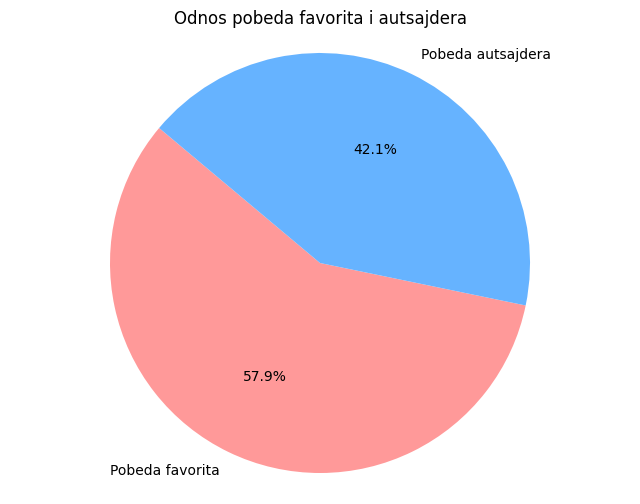

In [49]:
simple_team_merged_no_dup_df=simple_team_merged_df.drop_duplicates(subset=['game_id'])
favourite_winner_df=pd.merge(team_wins_df,simple_team_merged_no_dup_df,on=['game_id','date','season'])
favourite_winner_df.drop(columns=['h_team_id','a_team_id','team_id','opponent_id'],inplace=True)
favourite_winner_df['favorite_win'] = favourite_winner_df.apply(
    lambda row: 1 if (row['h_win_percentage'] >= row['a_win_percentage'] and row['team_win'] == 1) or 
                      (row['a_win_percentage'] >= row['h_win_percentage'] and row['team_win'] == 0)
               else 0,
    axis=1
)
favorite_wins = favourite_winner_df['favorite_win'].sum()
underdog_wins = len(favourite_winner_df) - favorite_wins
labels = ['Pobeda favorita', 'Pobeda autsajdera']
sizes = [favorite_wins, underdog_wins]
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(8, 6))
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.title("Odnos pobeda favorita i autsajdera")
#plt.savefig("./figures/Odnos_pobeda_favorita_i_autsajdera.png",dpi=300)
plt.show()

#### Spajanje svih statistika i dodavanje nekih kolona, pravljenje konačnog skupa podataka

In [50]:
final_player_stats=pd.merge(final_player_stats,team_defensive_rating_final_df,on=['date','game_id','season'],how='left')
final_player_stats=pd.merge(final_player_stats,team_offensive_rating_final_df.drop(columns=['h_team_id','a_team_id']),on=['date','game_id','season'],how='left')
final_player_stats=pd.merge(final_player_stats,team_name_by_id,left_on='opposing_team',right_on='team_name',how='left')
final_player_stats['opp_def_rating']=final_player_stats.apply(lambda row: row['h_def_rating'] if row['team_id']==row['h_team_id'] else row['a_def_rating'],axis=1)
final_player_stats['opp_avg_rec_points']=final_player_stats.apply(lambda row: row['h_avg_rec_points'] if row['team_id']==row['h_team_id'] else row['a_avg_rec_points'],axis=1)
final_player_stats['team_avg_scored_points']=final_player_stats.apply(lambda row: row['a_avg_scored_points'] if row['team_id']==row['h_team_id'] else row['h_avg_scored_points'],axis=1)

In [51]:
final_player_stats.drop(columns=['h_team_id','a_team_id','h_def_rating','a_def_rating','team_id','team_name','h_avg_rec_points','a_avg_rec_points','h_avg_scored_points','a_avg_scored_points'],inplace=True)


In [52]:
final_player_stats        

,player,player_team,opposing_team,date,game_id,season,home_court,Avg_Season_minutes,Avg_Season_points,Avg_Season_two_points_made,...,Last_2_Avg_fouls_received,Last_2_Avg_valuation,Last_2_Avg_ts%,avg_points_position,player_team_ranking,h_off_rating,a_off_rating,opp_def_rating,opp_avg_rec_points,team_avg_scored_points
0,Timothe Luwawu-Cabarrot,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,29.135714,13.523810,3.571429,...,0.0,-2.0,0.400000,24.307692,1,0.936315,0.970874,0.966889,76.653846,78.346154
1,Nando Colo De,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,20.897436,12.153846,1.769231,...,2.0,7.5,0.430000,31.423077,2,0.936315,0.970874,0.966889,76.653846,78.346154
2,Joffrey Lauvergne,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,26.100000,12.083333,4.250000,...,2.0,11.5,0.571429,20.923077,3,0.936315,0.970874,0.966889,76.653846,78.346154
3,Paris Lee,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,28.957051,12.076923,2.076923,...,2.5,13.5,0.550000,31.423077,4,0.936315,0.970874,0.966889,76.653846,78.346154
4,Mike Scott,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,22.953205,11.076923,2.923077,...,1.0,2.0,0.240000,24.307692,5,0.936315,0.970874,0.966889,76.653846,78.346154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24409,Brock Motum,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,12.859524,8.428571,2.142857,...,4.0,11.0,0.444444,39.866667,6,1.070937,1.020805,1.010547,80.800000,86.214286
24410,Bryant Dunston,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,24.921429,7.857143,3.142857,...,2.0,5.0,0.666667,17.214286,7,1.070937,1.020805,1.010547,80.800000,86.214286
24411,James Anderson,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,16.352381,5.714286,0.857143,...,1.0,12.0,1.000000,39.866667,8,1.070937,1.020805,1.010547,80.800000,86.214286
24412,Dogus Balbay,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,10.650000,2.500000,0.714286,...,0.0,19.0,1.000000,26.642857,9,1.070937,1.020805,1.010547,80.800000,86.214286


In [53]:
final_player_stats=pd.merge(final_player_stats,team_wins_df,on=['date','game_id','season'],how='left')
final_player_stats=pd.merge(final_player_stats,team_name_by_id,left_on='player_team',right_on='team_name',how='left')
final_player_stats['player_team_win_pct']=final_player_stats.apply(lambda row: row['h_win_percentage'] if row['team_id']==row['h_team_id'] else row['a_win_percentage'],axis=1)
final_player_stats['opposing_team_win_pct']=final_player_stats.apply(lambda row: row['a_win_percentage'] if row['team_id']==row['h_team_id'] else row['h_win_percentage'],axis=1)

In [54]:
final_player_stats.drop(columns=['h_team_id','a_team_id','h_win_percentage','a_win_percentage','team_id','team_name'],inplace=True)


In [55]:
final_player_stats

,player,player_team,opposing_team,date,game_id,season,home_court,Avg_Season_minutes,Avg_Season_points,Avg_Season_two_points_made,...,Last_2_Avg_ts%,avg_points_position,player_team_ranking,h_off_rating,a_off_rating,opp_def_rating,opp_avg_rec_points,team_avg_scored_points,player_team_win_pct,opposing_team_win_pct
0,Timothe Luwawu-Cabarrot,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,29.135714,13.523810,3.571429,...,0.400000,24.307692,1,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407
1,Nando Colo De,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,20.897436,12.153846,1.769231,...,0.430000,31.423077,2,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407
2,Joffrey Lauvergne,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,26.100000,12.083333,4.250000,...,0.571429,20.923077,3,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407
3,Paris Lee,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,28.957051,12.076923,2.076923,...,0.550000,31.423077,4,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407
4,Mike Scott,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,22.953205,11.076923,2.923077,...,0.240000,24.307692,5,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24409,Brock Motum,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,12.859524,8.428571,2.142857,...,0.444444,39.866667,6,1.070937,1.020805,1.010547,80.800000,86.214286,0.533333,0.500000
24410,Bryant Dunston,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,24.921429,7.857143,3.142857,...,0.666667,17.214286,7,1.070937,1.020805,1.010547,80.800000,86.214286,0.533333,0.500000
24411,James Anderson,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,16.352381,5.714286,0.857143,...,1.000000,39.866667,8,1.070937,1.020805,1.010547,80.800000,86.214286,0.533333,0.500000
24412,Dogus Balbay,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,10.650000,2.500000,0.714286,...,1.000000,26.642857,9,1.070937,1.020805,1.010547,80.800000,86.214286,0.533333,0.500000


In [56]:
final_player_stats = final_player_stats.merge(player_stats_combined_df[['game_id','points','player']],left_on=['game_id','player'],right_on=['game_id','player'])
#final_player_stats.to_csv("./organized_data/Konacni_podaci.csv",index=False)
final_player_stats

,player,player_team,opposing_team,date,game_id,season,home_court,Avg_Season_minutes,Avg_Season_points,Avg_Season_two_points_made,...,avg_points_position,player_team_ranking,h_off_rating,a_off_rating,opp_def_rating,opp_avg_rec_points,team_avg_scored_points,player_team_win_pct,opposing_team_win_pct,points
0,Timothe Luwawu-Cabarrot,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,29.135714,13.523810,3.571429,...,24.307692,1,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407,7
1,Nando Colo De,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,20.897436,12.153846,1.769231,...,31.423077,2,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407,13
2,Joffrey Lauvergne,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,26.100000,12.083333,4.250000,...,20.923077,3,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407,17
3,Paris Lee,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,28.957051,12.076923,2.076923,...,31.423077,4,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407,5
4,Mike Scott,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,22.953205,11.076923,2.923077,...,24.307692,5,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24409,Brock Motum,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,12.859524,8.428571,2.142857,...,39.866667,6,1.070937,1.020805,1.010547,80.800000,86.214286,0.533333,0.500000,2
24410,Bryant Dunston,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,24.921429,7.857143,3.142857,...,17.214286,7,1.070937,1.020805,1.010547,80.800000,86.214286,0.533333,0.500000,16
24411,James Anderson,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,16.352381,5.714286,0.857143,...,39.866667,8,1.070937,1.020805,1.010547,80.800000,86.214286,0.533333,0.500000,16
24412,Dogus Balbay,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,10.650000,2.500000,0.714286,...,26.642857,9,1.070937,1.020805,1.010547,80.800000,86.214286,0.533333,0.500000,0


#### Prikaz statistike podataka

In [57]:
final_player_stats.describe()

,home_court,Avg_Season_minutes,Avg_Season_points,Avg_Season_two_points_made,Avg_Season_two_points_attempted,Avg_Season_three_points_made,Avg_Season_three_points_attempted,Avg_Season_free_throws_made,Avg_Season_free_throws_attempted,Avg_Season_offensive_rebounds,...,avg_points_position,player_team_ranking,h_off_rating,a_off_rating,opp_def_rating,opp_avg_rec_points,team_avg_scored_points,player_team_win_pct,opposing_team_win_pct,points
count,24414.000000,24414.000000,24414.000000,24414.000000,24414.000000,24414.000000,24414.000000,24414.000000,24414.000000,24414.000000,...,24414.000000,24414.000000,24414.000000,24414.000000,24414.000000,24414.000000,24414.000000,24414.000000,24414.000000,24414.000000
mean,0.499549,19.690565,7.853818,1.942799,3.616154,0.881187,2.402402,1.324660,1.692890,0.826554,...,28.278571,4.929835,0.973832,0.973213,0.967140,78.952032,79.479953,0.478227,0.470837,7.949660
std,0.500010,6.188176,3.942984,1.196900,2.009514,0.723084,1.779010,1.022645,1.225254,0.697241,...,7.582914,2.735824,0.050536,0.055034,0.046477,4.429262,4.733107,0.176859,0.177883,6.159758
min,0.000000,0.241667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.728929,0.595593,0.595593,50.000000,50.000000,0.000000,0.000000,0.000000
25%,0.000000,15.297396,5.000000,1.000000,2.047619,0.285714,1.000000,0.600000,0.800000,0.312500,...,23.071429,3.000000,0.939248,0.936458,0.943310,76.500000,76.375000,0.360000,0.350000,3.000000
50%,0.000000,20.034530,7.523810,1.760000,3.342481,0.785714,2.210526,1.100000,1.466667,0.636364,...,29.500000,5.000000,0.973153,0.975810,0.971342,78.937500,79.692308,0.500000,0.483871,7.000000
75%,1.000000,24.197234,10.250000,2.705882,4.894737,1.333333,3.562500,1.833333,2.333333,1.176471,...,33.739130,7.000000,1.008055,1.008733,0.993991,81.368421,82.909091,0.600000,0.600000,12.000000
max,1.000000,44.033333,32.000000,9.000000,18.000000,6.000000,12.000000,8.000000,11.000000,9.000000,...,70.000000,12.000000,1.164406,1.219822,1.219822,97.000000,100.000000,0.909091,0.909091,49.000000


#### Matrica korelacije

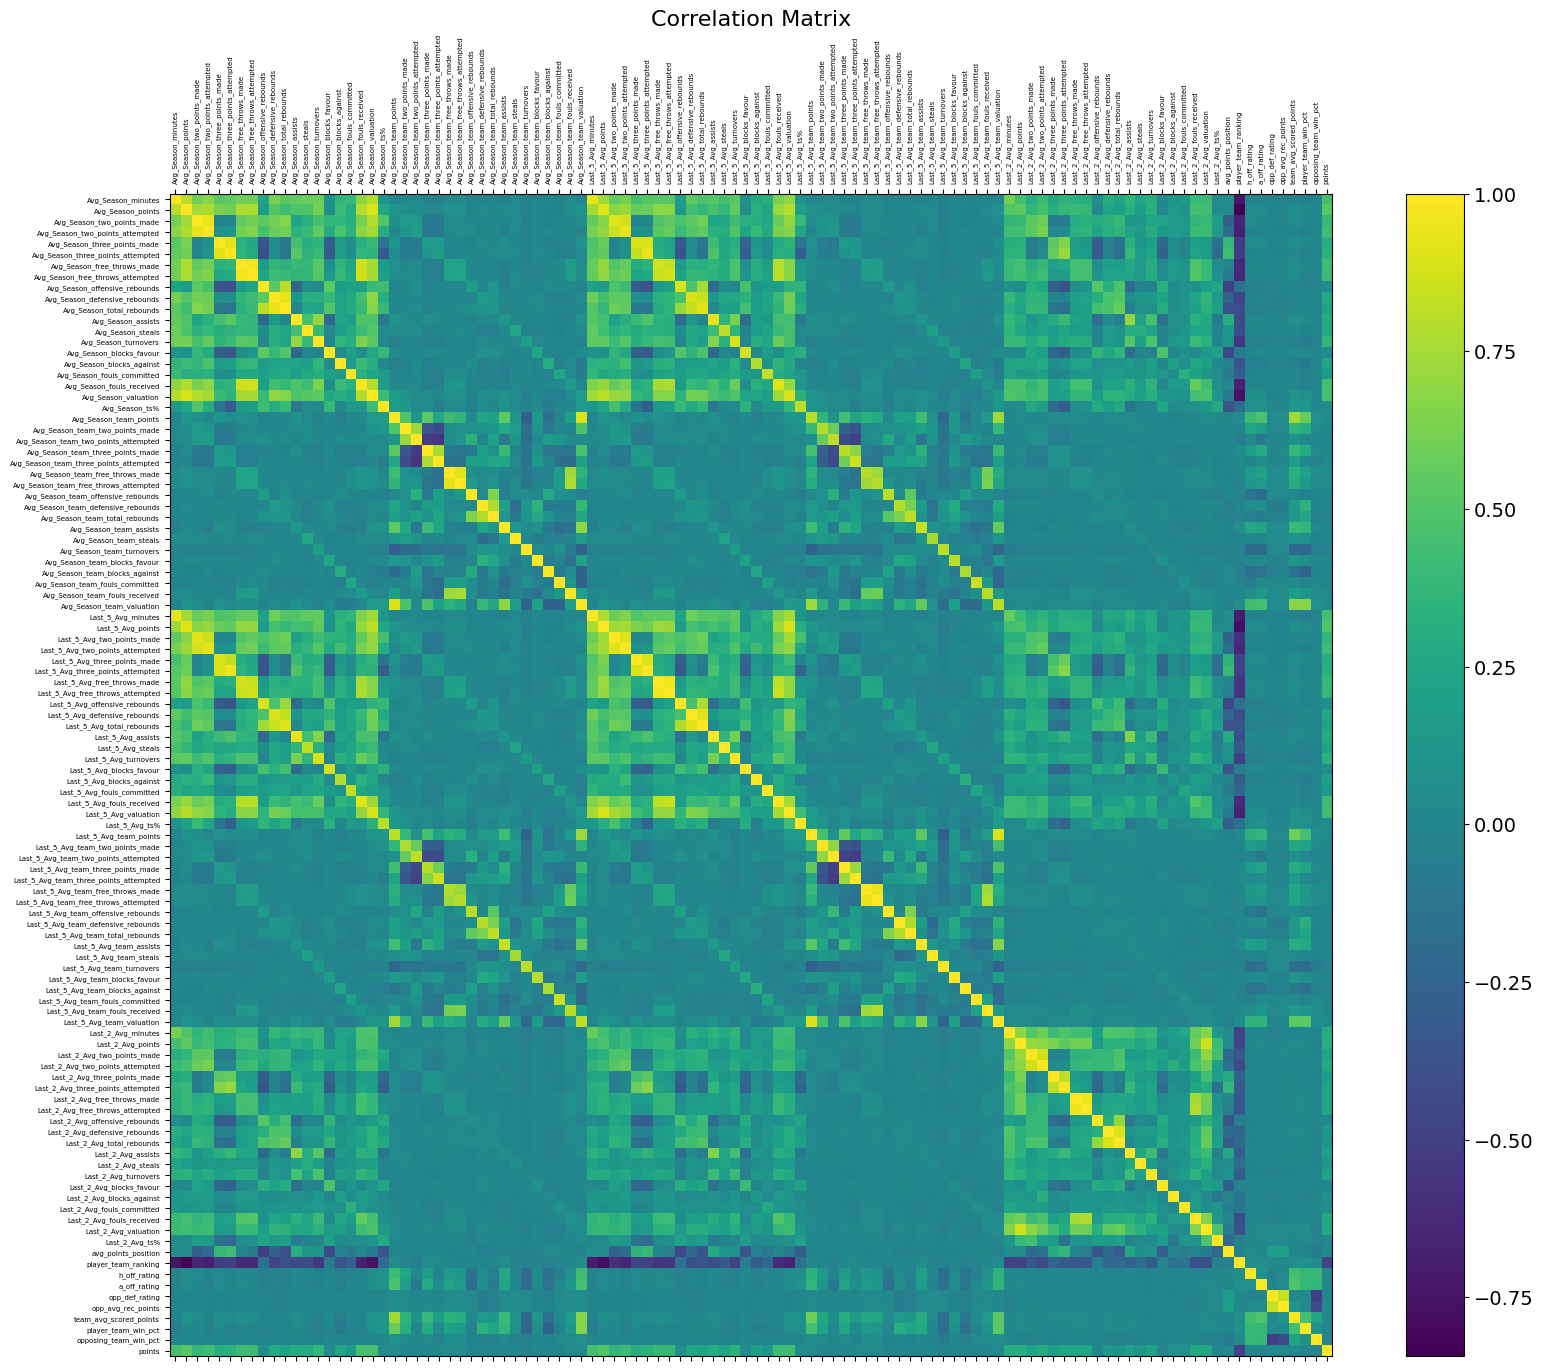

In [58]:
final_player_corr_stats=final_player_stats.iloc[:,7:]
corr=final_player_corr_stats.corr()
f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(final_player_corr_stats.select_dtypes(['number']).shape[1]), final_player_corr_stats.select_dtypes(['number']).columns, fontsize=5, rotation=90)
plt.yticks(range(final_player_corr_stats.select_dtypes(['number']).shape[1]), final_player_corr_stats.select_dtypes(['number']).columns, fontsize=5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
#plt.savefig("./figures/Matrica korelacije.png",dpi=300)

In [59]:
corrcoefs=[]
for feature in final_player_corr_stats.columns[:-1].tolist():
    corrcoef=np.corrcoef(final_player_corr_stats[feature].values,final_player_corr_stats["points"])[0,1]
    corrcoefs.append(corrcoef)
    print(f"{feature} - {corrcoef}")

Avg_Season_minutes - 0.45699184982736507
Avg_Season_points - 0.5251293773719162
Avg_Season_two_points_made - 0.39072971472339185
Avg_Season_two_points_attempted - 0.43345111070564624
Avg_Season_three_points_made - 0.32030415497558135
Avg_Season_three_points_attempted - 0.3448631765433824
Avg_Season_free_throws_made - 0.4306748966813976
Avg_Season_free_throws_attempted - 0.4239567317665348
Avg_Season_offensive_rebounds - 0.0708919982380647
Avg_Season_defensive_rebounds - 0.2819015067033059
Avg_Season_total_rebounds - 0.22675231646994387
Avg_Season_assists - 0.3013791726633393
Avg_Season_steals - 0.2801222888531741
Avg_Season_turnovers - 0.37820659030583126
Avg_Season_blocks_favour - 0.042788716057301786
Avg_Season_blocks_against - 0.2434701604802048
Avg_Season_fouls_committed - 0.15922003811859484
Avg_Season_fouls_received - 0.4498414175229913
Avg_Season_valuation - 0.46228304681041854
Avg_Season_ts% - 0.05989448707599822
Avg_Season_team_points - 0.04865013257759979
Avg_Season_team_two_

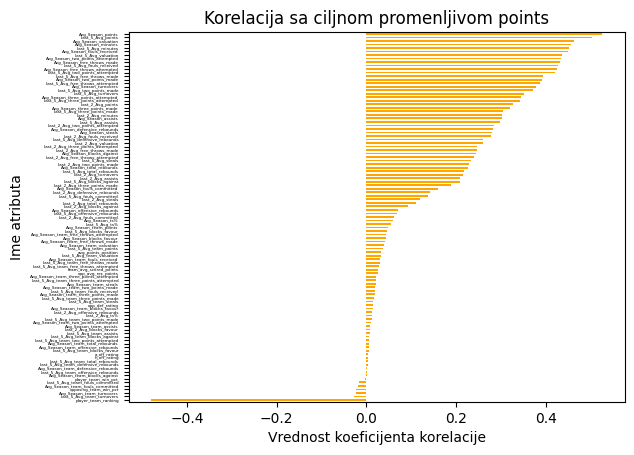

In [60]:
coefs_for_plot = pd.Series(corrcoefs).sort_values()
coefs_for_plot.plot(kind="barh", color='orange')

plt.title("Korelacija sa ciljnom promenljivom points")
plt.ylabel('Ime atributa')
plt.xlabel('Vrednost koeficijenta korelacije')
plt.yticks(np.arange(len(final_player_corr_stats.columns[:-1].tolist())),
           list(final_player_corr_stats.columns[:-1][coefs_for_plot.index]),fontsize=3)
#plt.savefig("./figures/Korelacija atributa sa ciljnom promenljivom.png",dpi=300)
plt.show()

#### Prikaz nekih statistika konačnog skupa podataka

In [61]:
final_player_stats

,player,player_team,opposing_team,date,game_id,season,home_court,Avg_Season_minutes,Avg_Season_points,Avg_Season_two_points_made,...,avg_points_position,player_team_ranking,h_off_rating,a_off_rating,opp_def_rating,opp_avg_rec_points,team_avg_scored_points,player_team_win_pct,opposing_team_win_pct,points
0,Timothe Luwawu-Cabarrot,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,29.135714,13.523810,3.571429,...,24.307692,1,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407,7
1,Nando Colo De,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,20.897436,12.153846,1.769231,...,31.423077,2,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407,13
2,Joffrey Lauvergne,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,26.100000,12.083333,4.250000,...,20.923077,3,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407,17
3,Paris Lee,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,28.957051,12.076923,2.076923,...,31.423077,4,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407,5
4,Mike Scott,LDLC ASVEL VILLEURBANNE,AX ARMANI EXCHANGE OLIMPIA MILAN,2024-03-01,E2023_243,2023,1,22.953205,11.076923,2.923077,...,24.307692,5,0.936315,0.970874,0.966889,76.653846,78.346154,0.185185,0.407407,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24409,Brock Motum,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,12.859524,8.428571,2.142857,...,39.866667,6,1.070937,1.020805,1.010547,80.800000,86.214286,0.533333,0.500000,2
24410,Bryant Dunston,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,24.921429,7.857143,3.142857,...,17.214286,7,1.070937,1.020805,1.010547,80.800000,86.214286,0.533333,0.500000,16
24411,James Anderson,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,16.352381,5.714286,0.857143,...,39.866667,8,1.070937,1.020805,1.010547,80.800000,86.214286,0.533333,0.500000,16
24412,Dogus Balbay,ANADOLU EFES ISTANBUL,FC BAYERN MUNICH,2019-01-03,E2018_121,2018,1,10.650000,2.500000,0.714286,...,26.642857,9,1.070937,1.020805,1.010547,80.800000,86.214286,0.533333,0.500000,0


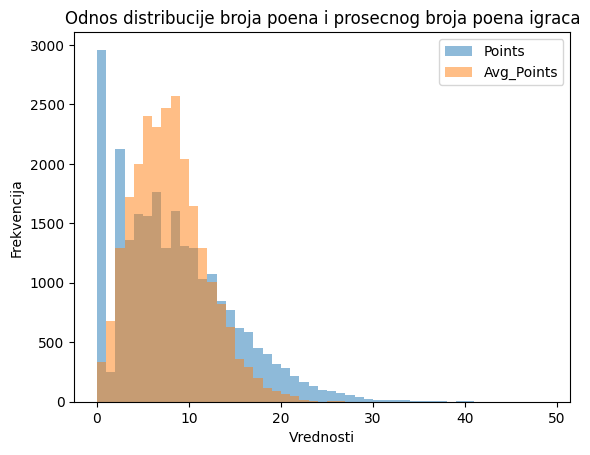

In [62]:
plt.hist(final_player_stats['points'],bins=np.arange(0,50),alpha=0.5,label="Points")
plt.hist(final_player_stats['Avg_Season_points'],bins=np.arange(0,50),alpha=0.5,label="Avg_Points")
plt.title('Odnos distribucije broja poena i prosecnog broja poena igraca')
plt.xlabel('Vrednosti')
plt.ylabel('Frekvencija')
plt.legend()
#plt.savefig("./figures/Distribucija broja poena i prosecnog broja poena igraca.png",dpi=300)
plt.show()

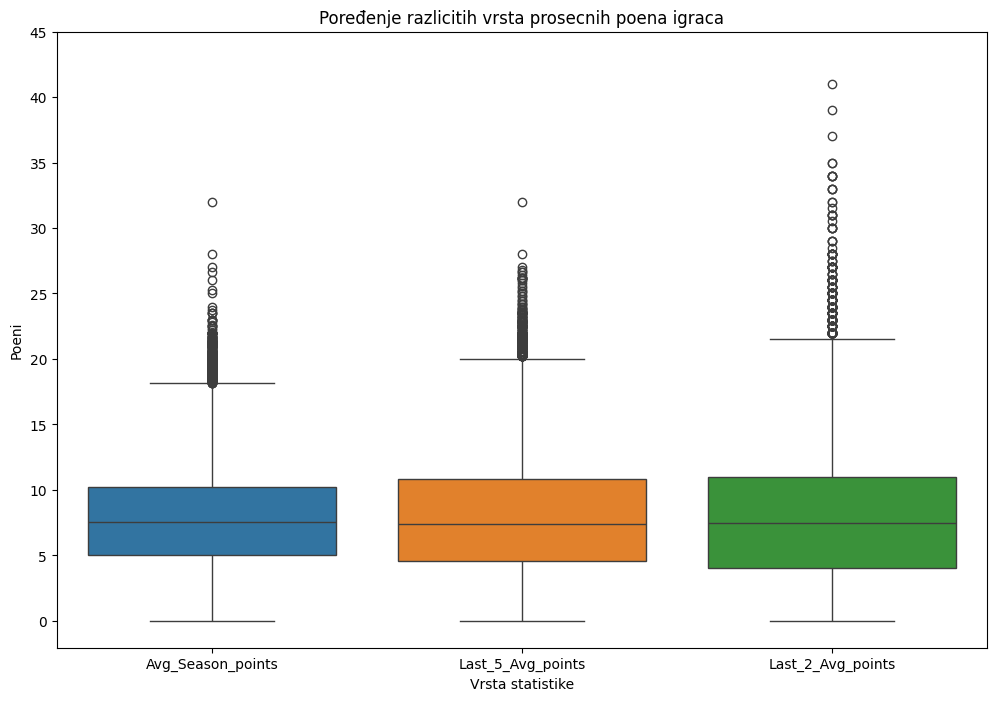

In [63]:
# Box-plot za poređenje performansi u različitim periodima
plt.figure(figsize=(12, 8))
sns.boxplot(data=final_player_stats[['Avg_Season_points', 'Last_5_Avg_points', 'Last_2_Avg_points']])
plt.title('Poređenje razlicitih vrsta prosecnih poena igraca')
plt.ylabel('Poeni')
plt.xlabel('Vrsta statistike')
plt.yticks(ticks=np.arange(0,46,5))
#plt.savefig("./figures/Poredjene_razlicitih_vrsta_prosecnih_poena_igraca.png",dpi=300)
plt.show()

In [64]:
# Pretpostavimo da imate kolonu 'home_court' koja označava da li je utakmica kod kuće ili na strani
home_games = final_player_stats[final_player_stats['home_court'] == True]
away_games = final_player_stats[final_player_stats['home_court'] == False]

# Prikazivanje prosečnih poena kod kuće vs na strani
home_points_avg = home_games['points'].mean()
away_points_avg = away_games['points'].mean()

print(f"Prosečni poeni kod kuće: {home_points_avg}")
print(f"Prosečni poeni na strani: {away_points_avg}")


Prosečni poeni kod kuće: 8.13520826500492
Prosečni poeni na strani: 7.764445899492552


In [65]:
final_player_stats[final_player_stats['player']=='Nemanja Nedovic']

,player,player_team,opposing_team,date,game_id,season,home_court,Avg_Season_minutes,Avg_Season_points,Avg_Season_two_points_made,...,avg_points_position,player_team_ranking,h_off_rating,a_off_rating,opp_def_rating,opp_avg_rec_points,team_avg_scored_points,player_team_win_pct,opposing_team_win_pct,points
45,Nemanja Nedovic,CRVENA ZVEZDA MTS BELGRADE,FC BAYERN MUNICH,2024-03-01,E2023_241,2023,0,21.120290,13.739130,2.913043,...,34.230769,1,0.951396,0.978081,0.999533,82.307692,82.038462,0.370370,0.407407,10
245,Nemanja Nedovic,CRVENA ZVEZDA MTS BELGRADE,ZALGIRIS KAUNAS,2024-02-09,E2023_231,2023,1,20.987121,13.681818,2.909091,...,34.560000,1,0.972381,0.996054,0.991164,80.320000,81.680000,0.384615,0.384615,15
398,Nemanja Nedovic,CRVENA ZVEZDA MTS BELGRADE,FC BARCELONA LASSA,2024-02-02,E2023_223,2023,1,20.585714,13.333333,2.857143,...,31.416667,1,0.995047,0.977186,0.946149,78.625000,81.916667,0.400000,0.640000,21
694,Nemanja Nedovic,CRVENA ZVEZDA MTS BELGRADE,VALENCIA BASKET,2024-01-30,E2023_208,2023,1,20.692500,12.650000,2.900000,...,34.652174,1,0.973618,0.932894,0.925995,76.000000,81.913043,0.375000,0.500000,27
853,Nemanja Nedovic,CRVENA ZVEZDA MTS BELGRADE,ALBA BERLIN,2024-01-25,E2023_199,2023,0,21.108772,12.947368,2.947368,...,36.090909,1,0.976640,0.897460,1.003439,84.227273,82.000000,0.391304,0.173913,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21639,Nemanja Nedovic,AX ARMANI EXCHANGE OLIMPIA MILAN,KHIMKI MOSCOW REGION,2019-11-14,E2019_064,2019,0,20.250000,6.666667,0.333333,...,35.857143,4,1.019588,0.976886,0.952928,83.000000,80.000000,0.750000,0.625000,13
22693,Nemanja Nedovic,AX ARMANI EXCHANGE OLIMPIA MILAN,PANATHINAIKOS OPAP ATHENS,2019-03-22,E2018_224,2018,1,23.279167,12.083333,2.083333,...,28.040000,3,0.956543,1.031493,0.948673,78.962963,87.037037,0.500000,0.500000,8
22824,Nemanja Nedovic,AX ARMANI EXCHANGE OLIMPIA MILAN,REAL MADRID,2019-03-20,E2018_216,2018,0,23.553030,11.727273,1.909091,...,29.916667,3,1.049391,1.030280,0.931044,76.961538,86.961538,0.518519,0.740741,16
23008,Nemanja Nedovic,AX ARMANI EXCHANGE OLIMPIA MILAN,OLYMPIACOS PIRAEUS,2019-03-14,E2018_204,2018,1,23.561667,12.200000,1.900000,...,29.478261,3,0.969364,1.036820,0.975327,77.480000,87.800000,0.500000,0.500000,7


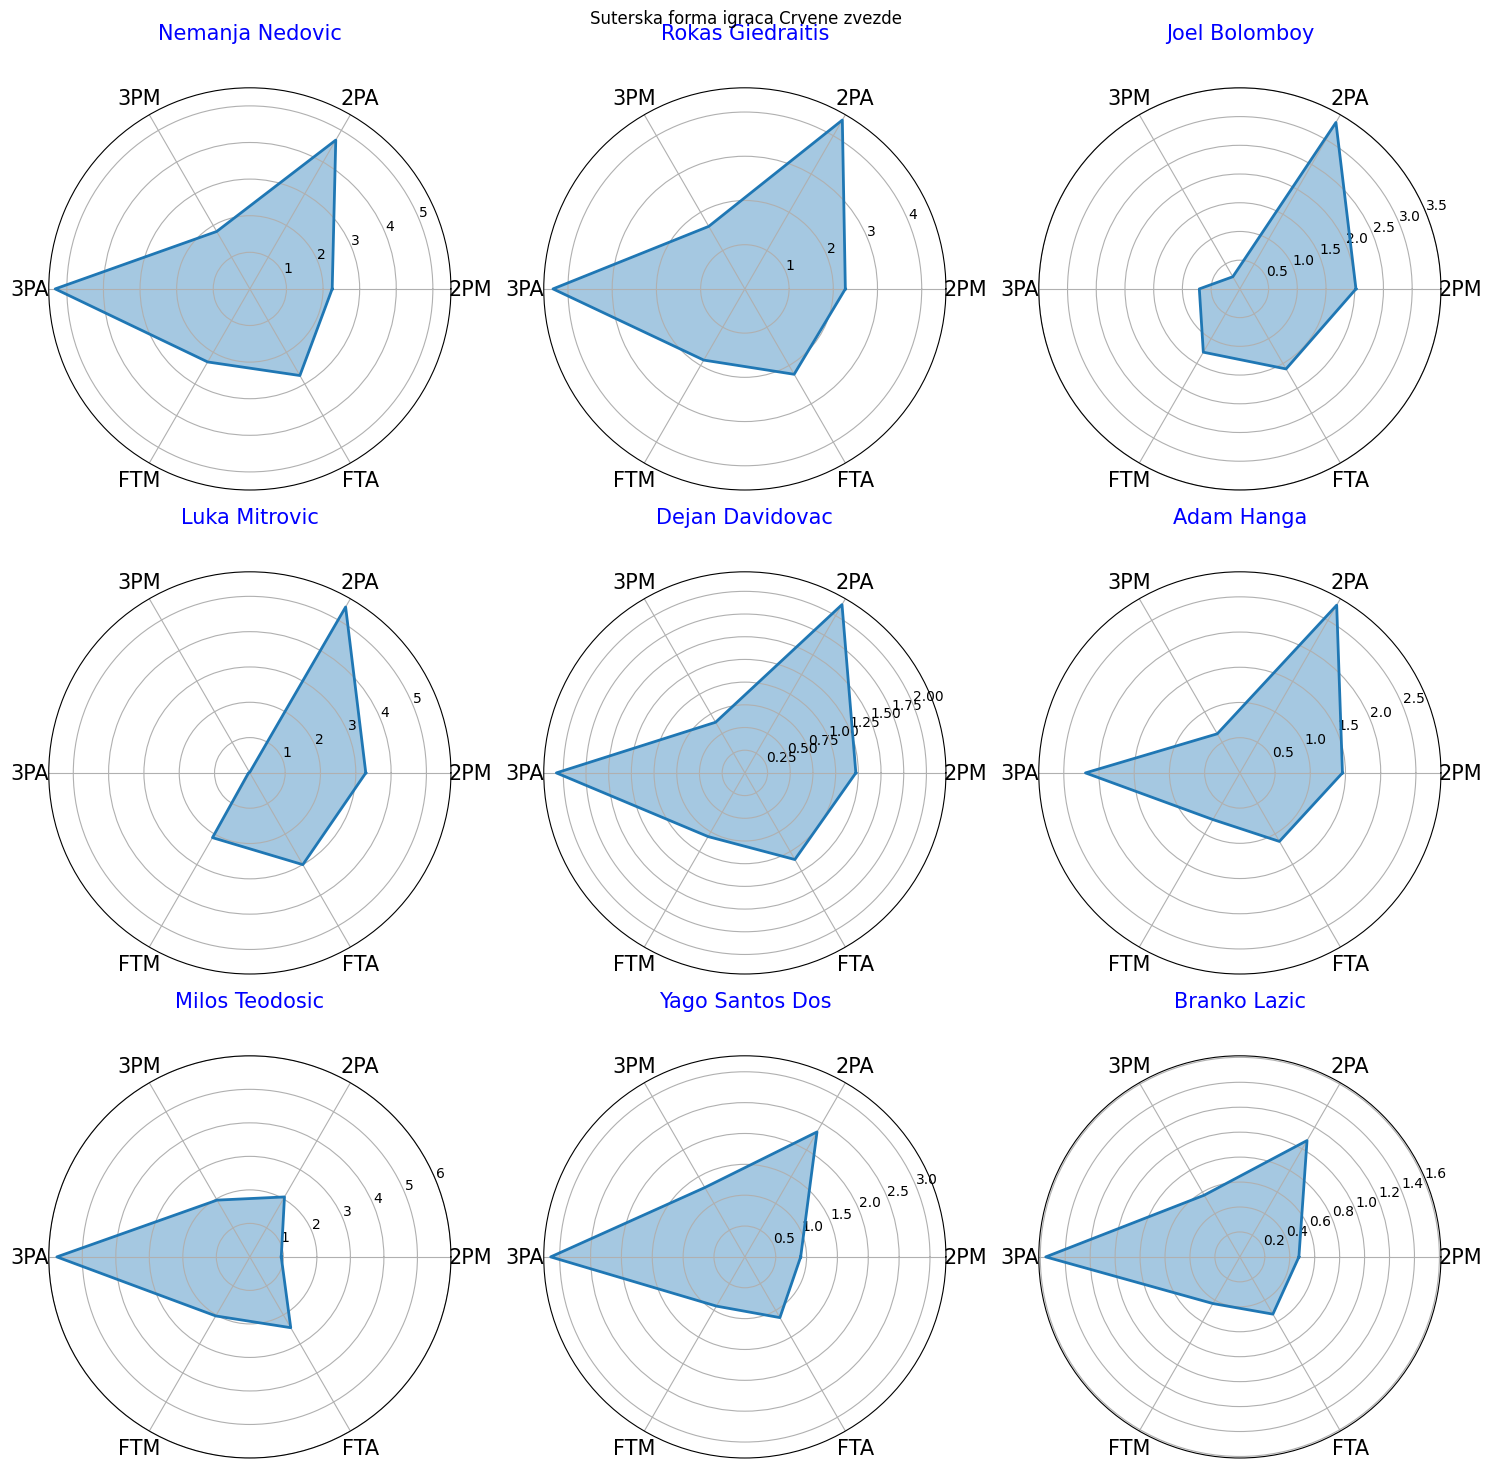

In [66]:
categories = ['Avg_Season_two_points_made','Avg_Season_two_points_attempted', 'Avg_Season_three_points_made','Avg_Season_three_points_attempted','Avg_Season_free_throws_made','Avg_Season_free_throws_attempted']
player_names =['Nemanja Nedovic','Rokas Giedraitis','Joel Bolomboy','Luka Mitrovic','Dejan Davidovac','Adam Hanga','Milos Teodosic','Yago Santos Dos','Branko Lazic']
shortened_categories = ['2PM', '2PA', '3PM', '3PA', 'FTM', 'FTA']

N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, axes = plt.subplots(3, 3, figsize=(15, 15), subplot_kw=dict(polar=True))

for i, ax in enumerate(axes.flatten()):
    player_name=player_names[i]
    player_stats = final_player_stats[final_player_stats['player'] == player_name][categories].mean().tolist()
    player_stats += player_stats[:1]
    ax.plot(angles, player_stats, linewidth=2, linestyle='solid')
    ax.fill(angles, player_stats, alpha=0.4)
    ax.set_title(player_name, size=15, color='blue', y=1.1)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(shortened_categories, fontsize=15)
    # ax.tick_params(axis='both', which='major', labelsize=8)

fig.suptitle("Suterska forma igraca Crvene zvezde")
plt.tight_layout()
#plt.savefig("./figures/Suterska_forma_igraca_Crvene_zvezde.png",dpi=300)
plt.show()


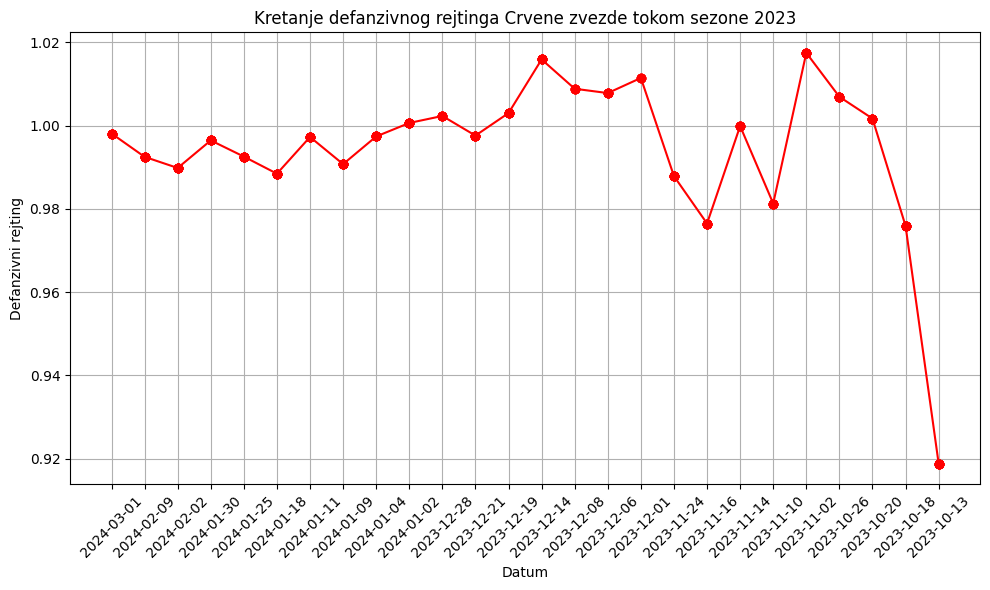

In [67]:
czv_2023=final_player_stats[(final_player_stats['opposing_team']=='CRVENA ZVEZDA MTS BELGRADE') & (final_player_stats['season']=='2023')]
plt.figure(figsize=(10, 6))
plt.plot(czv_2023['date'], czv_2023['opp_def_rating'], marker='o', linestyle='-', color='red')
plt.title('Kretanje defanzivnog rejtinga Crvene zvezde tokom sezone 2023')
plt.xlabel('Datum')
plt.ylabel('Defanzivni rejting')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
#plt.savefig("./figures/Defanzivni_rejting_Crvene_zvezde_tokom_sezone_2023.png",dpi=300)
plt.show()

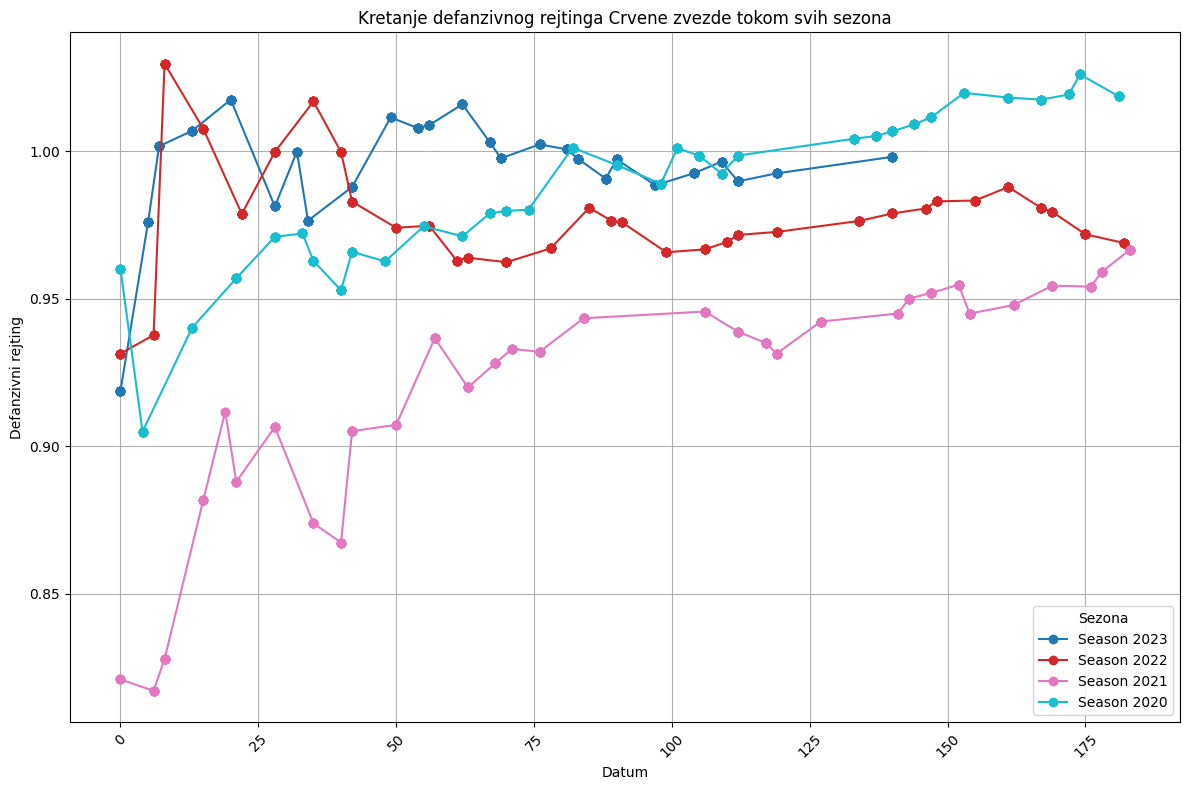

In [68]:
czv_stats=final_player_stats[final_player_stats['opposing_team']=='CRVENA ZVEZDA MTS BELGRADE']
plt.figure(figsize=(12, 8))
seasons=['2023','2022','2021','2020']
colors=plt.cm.get_cmap('tab10',len(seasons))

czv_stats['start_of_season'] = czv_stats.groupby('season')['date'].transform('min')
czv_stats['start_of_season'] = pd.to_datetime(czv_stats['start_of_season'])
czv_stats['date'] = pd.to_datetime(czv_stats['date'])
czv_stats['days_from_start'] = (czv_stats['date'] - czv_stats['start_of_season']).dt.days

for i, season in enumerate(seasons):
    season_data = czv_stats[czv_stats['season'] == season]
    plt.plot(season_data['days_from_start'], season_data['opp_def_rating'], marker='o', linestyle='-', color=colors(i), label=f'Season {season}')


plt.title('Kretanje defanzivnog rejtinga Crvene zvezde tokom svih sezona')
plt.xlabel('Datum')
plt.ylabel('Defanzivni rejting')
plt.xticks(rotation=45)
plt.legend(title='Sezona')
plt.grid(True)
plt.tight_layout()
#plt.savefig("./figures/Kretanje defanzivnog rejtinga Crvene zvezde tokom sezona 2020-2023.png",dpi=300)
plt.show()